In [60]:
import importlib
import data_loader
importlib.reload(data_loader)
import importlib
import visualization
importlib.reload(visualization)
import regressor
importlib.reload(regressor)

<module 'regressor' from '/content/regressor.py'>

Датасет загружен. Размер данных: (20640, 9)

Пропущенных значений в данных нет.

Описание данных:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558 

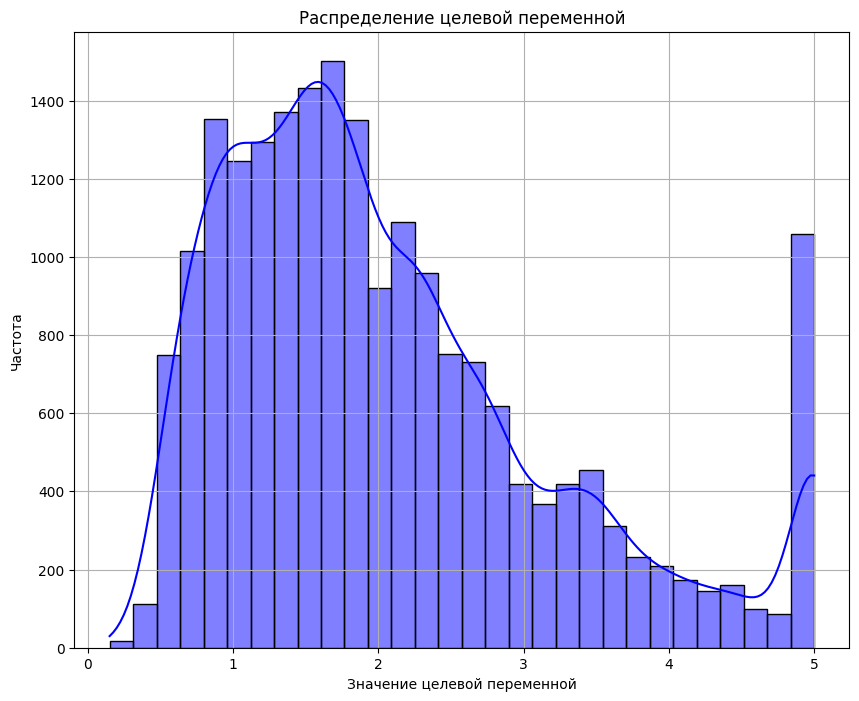

График выше показывает распределение целевой переменной `MedHouseVal` (медианной стоимости домов).

Значения целевой переменной сконцентрированы в диапазоне от 0 до 3 с двумя явными пиками около 1 и 5.
Вероятно, ваше распределение асимметрично и мультимодальное.
Если модель плохо предсказывает редкие значения (например, между 3 и 4), стоит рассмотреть методы обработки дисбаланса данных или добавить веса для редких значений.

Обучающая выборка: (16512, 8), Тестовая выборка: (4128, 8)

Обучение и оценка регрессора: Gradient Boosting
Результаты Gradient Boosting: MSE=0.2378, MAE=0.3275, R2=0.8185



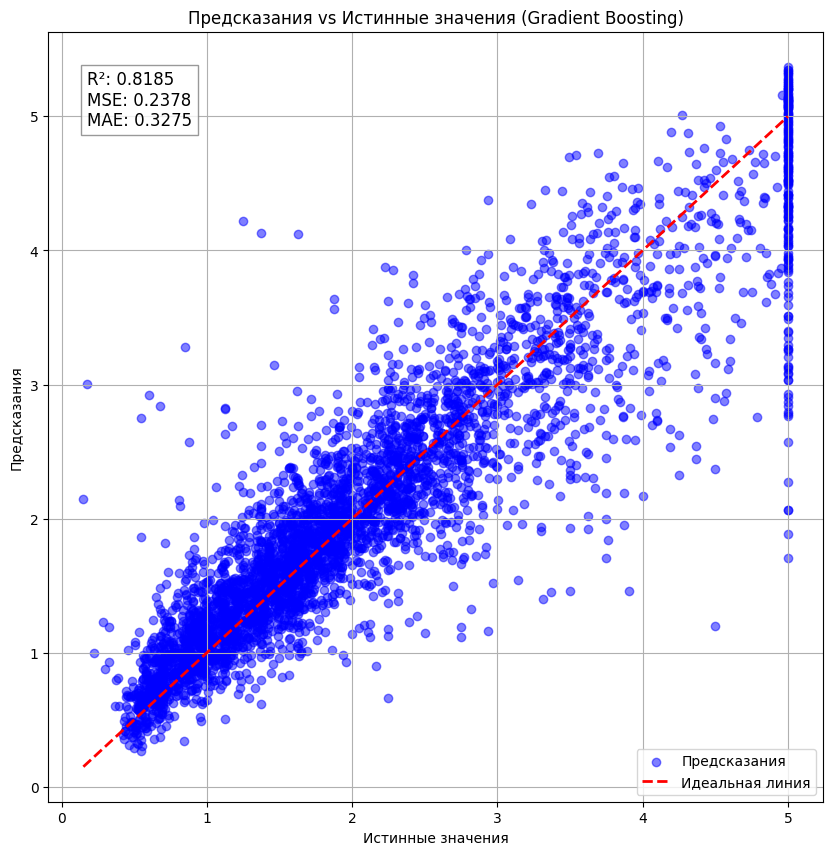

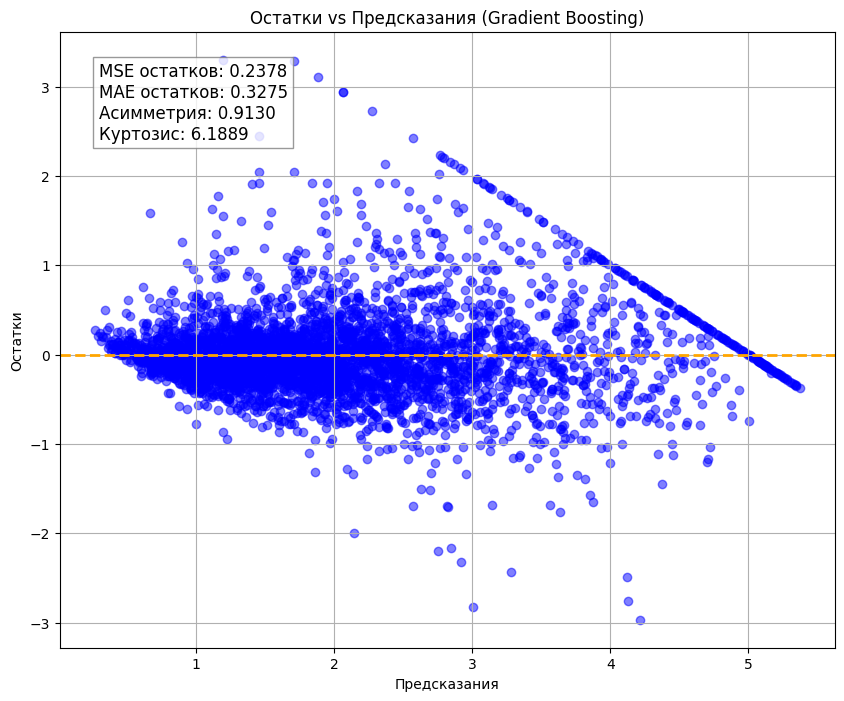

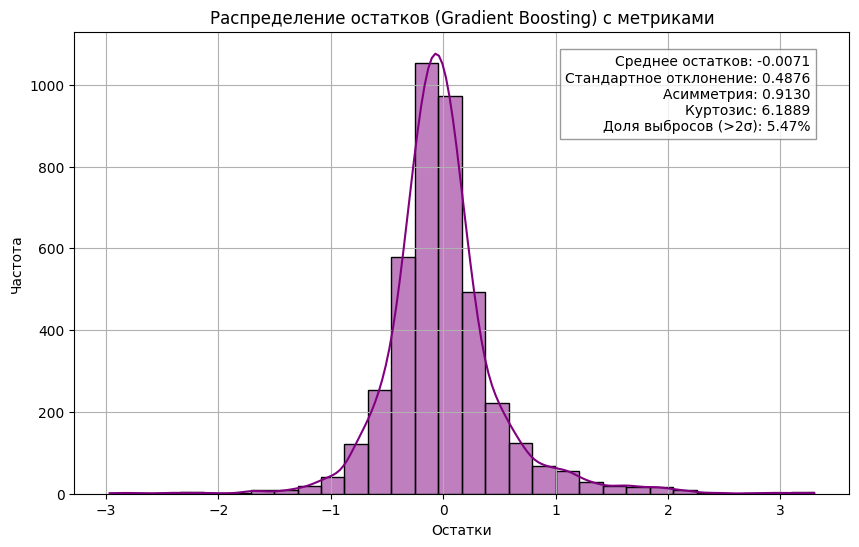

Обучение и оценка регрессора: LGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
Результаты LGBM: MSE=0.2010, MAE=0.2941, R2=0.8466



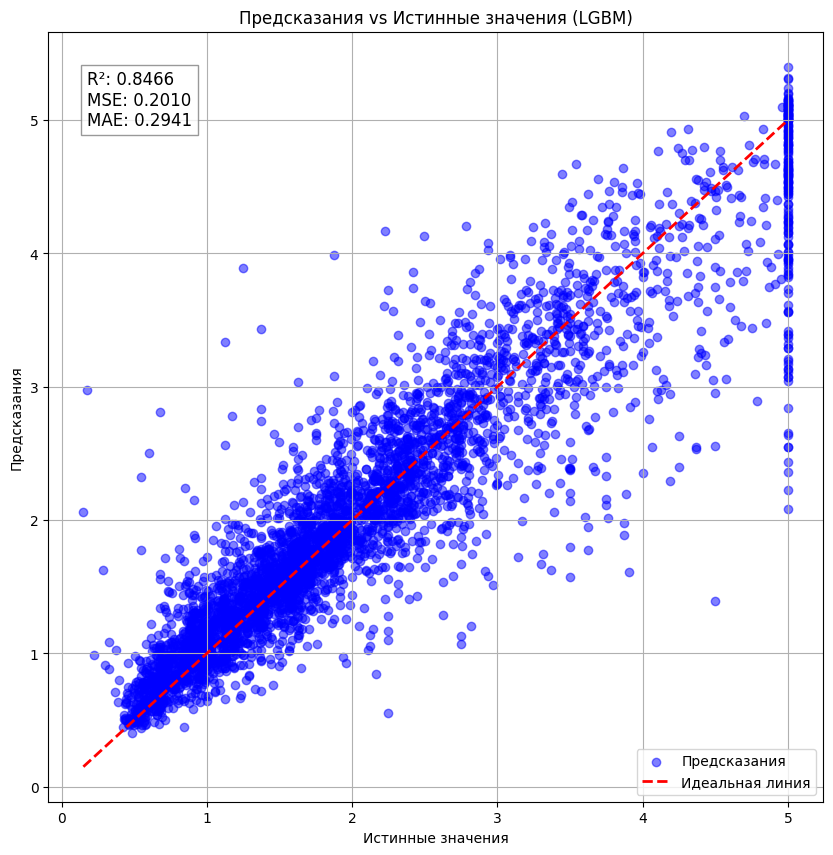

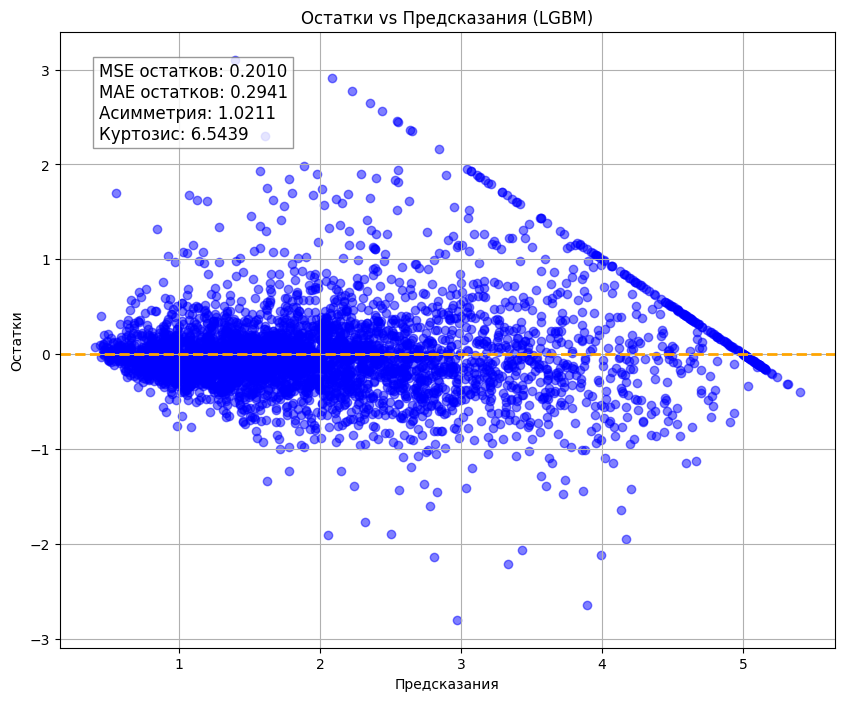

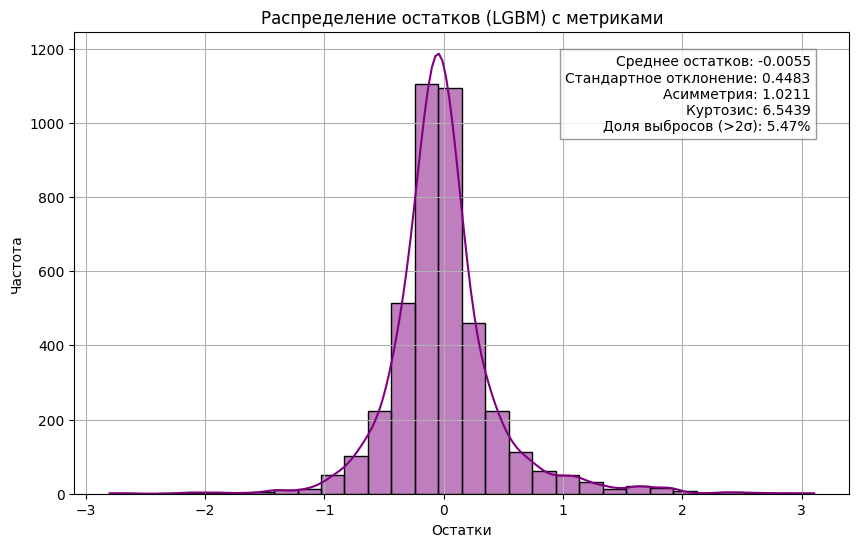

Обучение и оценка регрессора: XGBoost
Результаты XGBoost: MSE=0.2152, MAE=0.3026, R2=0.8358



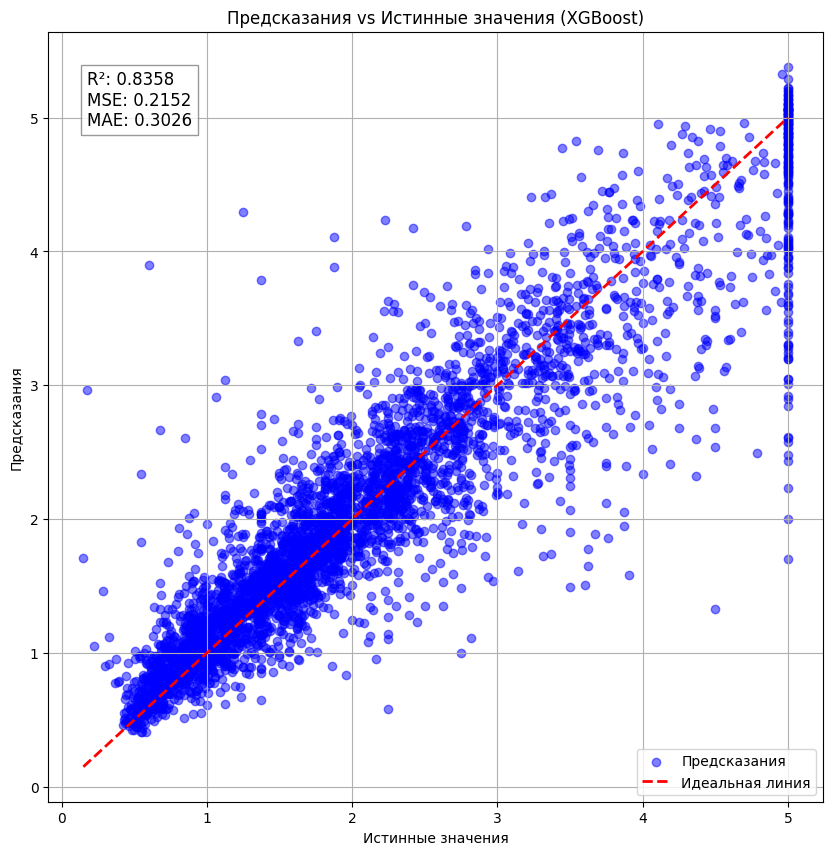

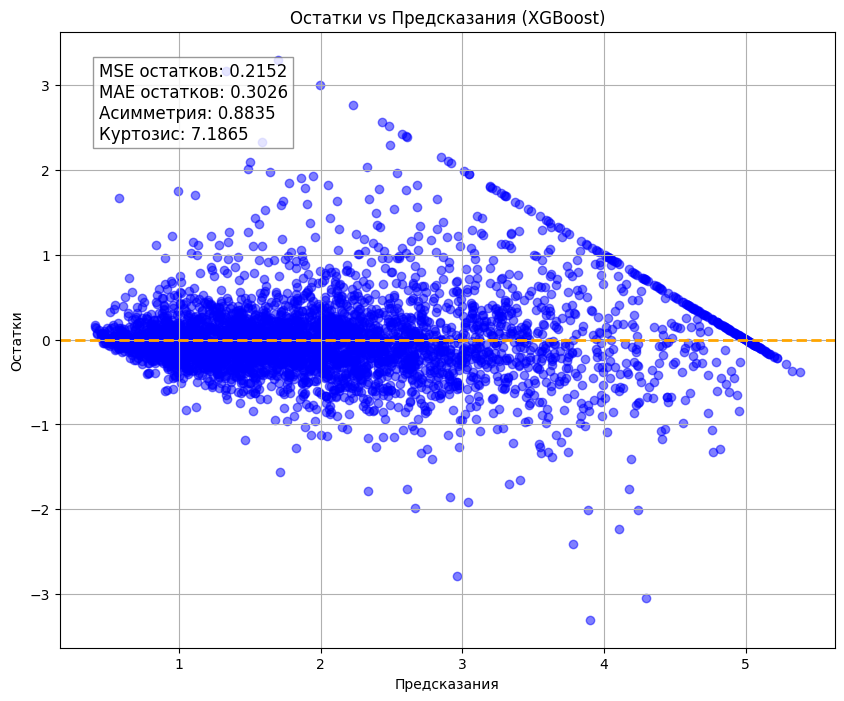

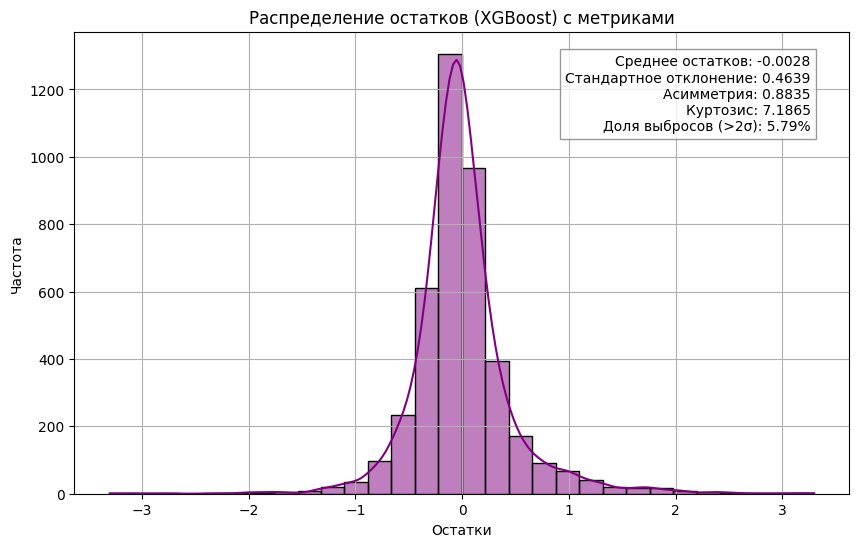

Обучение и оценка регрессора: Extra Trees
Результаты Extra Trees: MSE=0.2521, MAE=0.3255, R2=0.8076



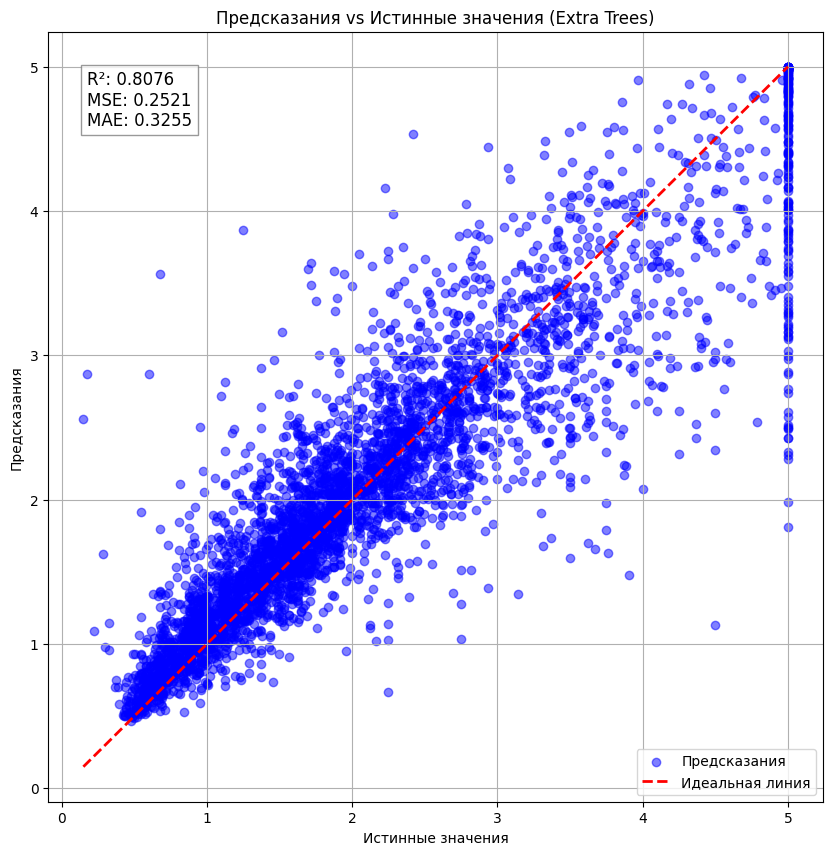

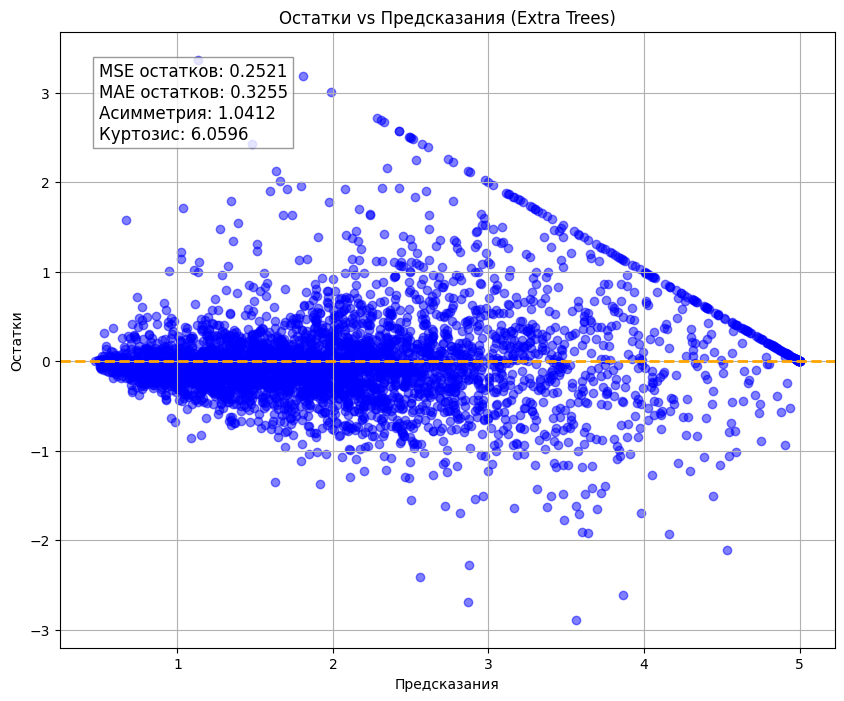

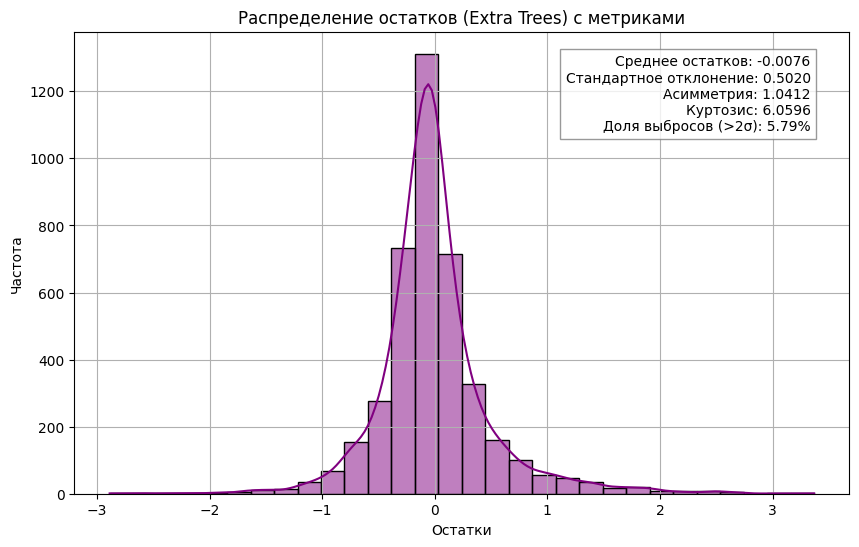

Обучение и оценка регрессора: Random Forest
Результаты Random Forest: MSE=0.2540, MAE=0.3268, R2=0.8062



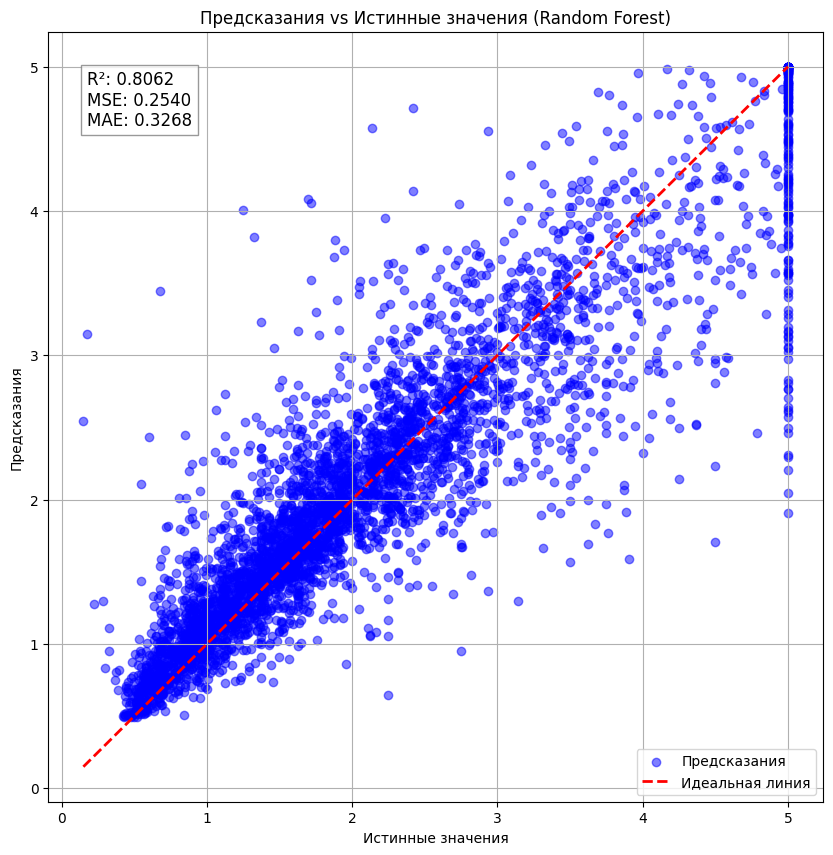

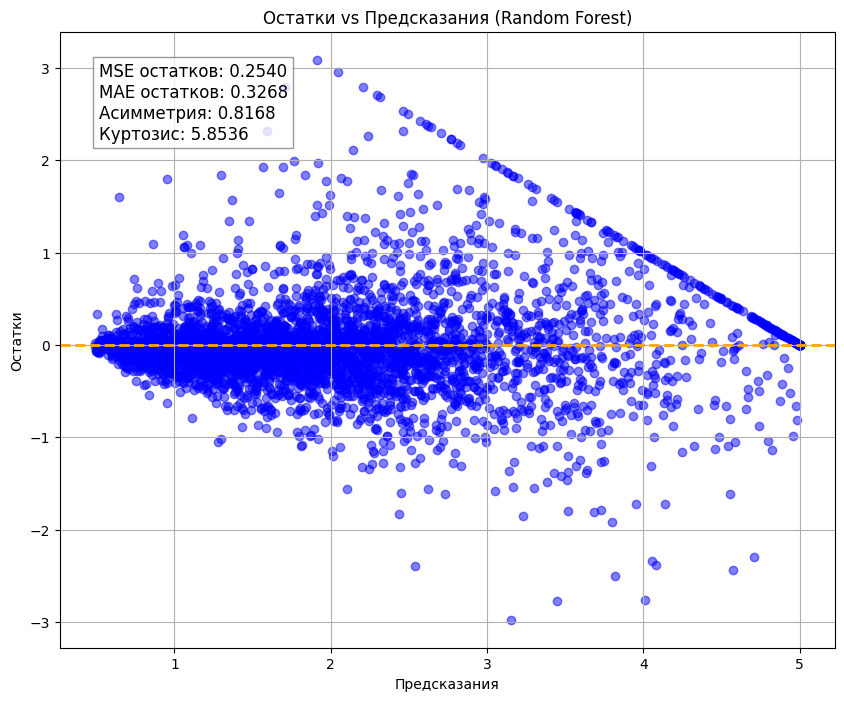

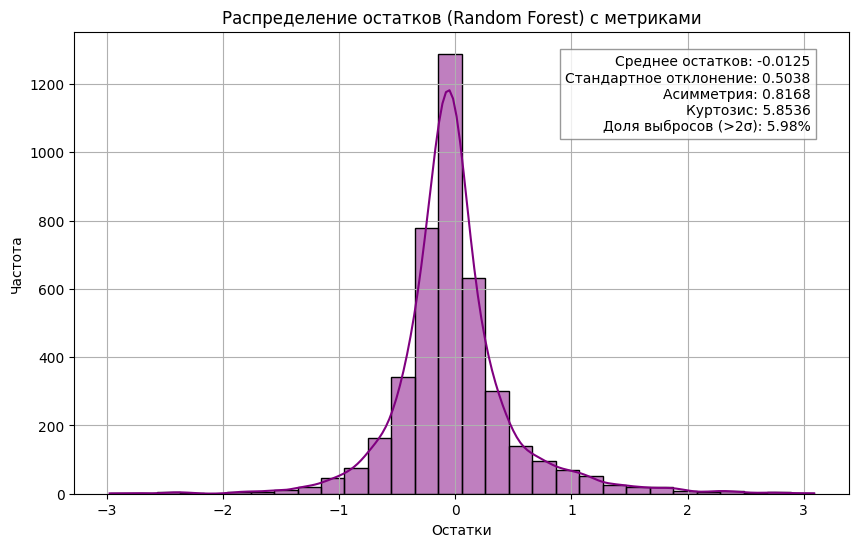

Обучение и оценка регрессора: CatBoost
Результаты CatBoost: MSE=0.2303, MAE=0.3230, R2=0.8243



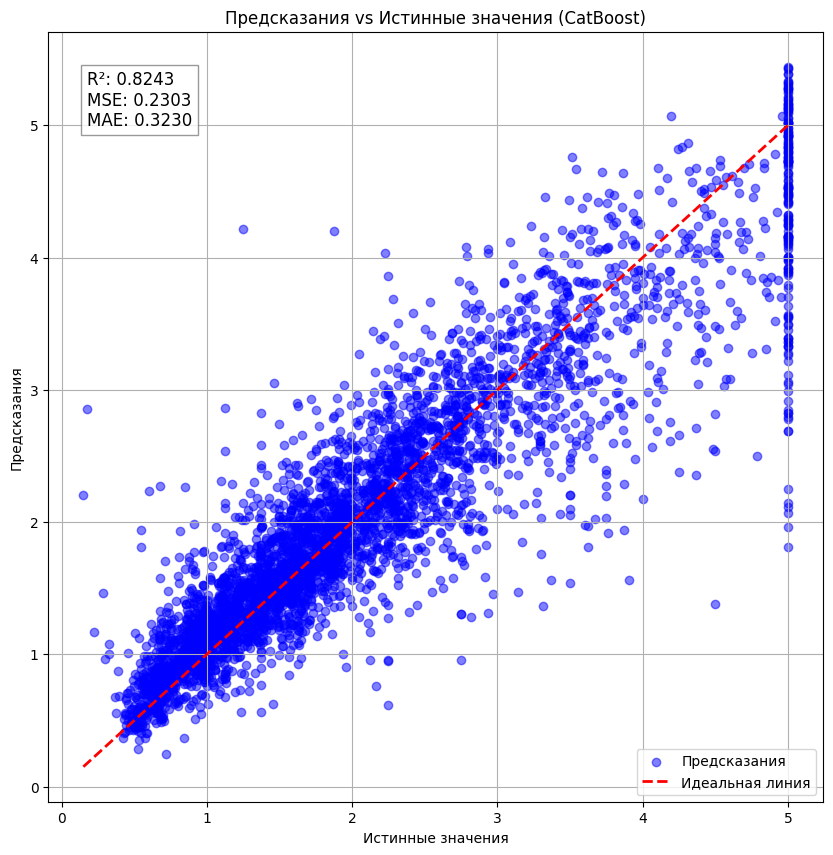

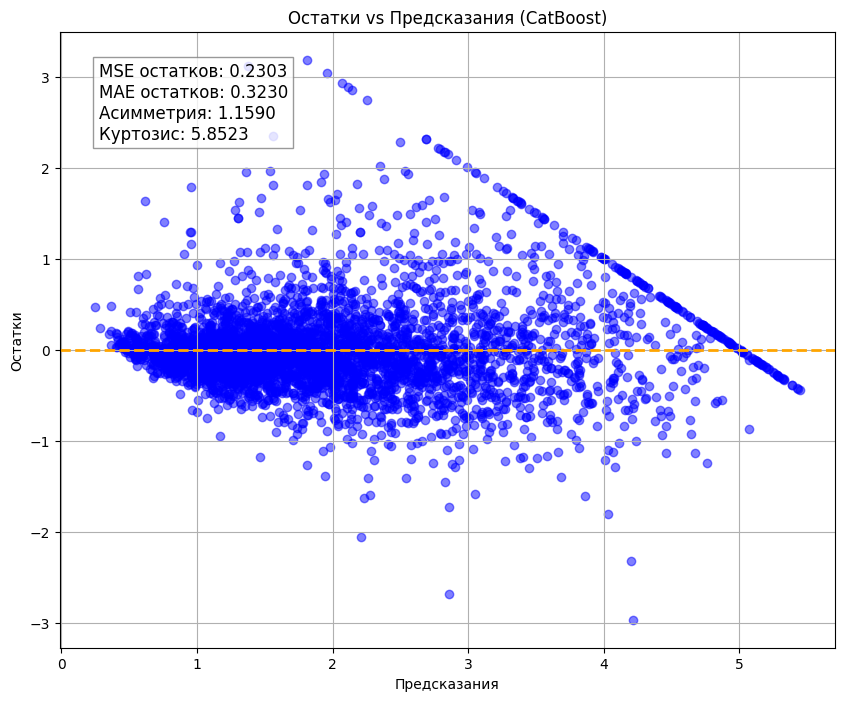

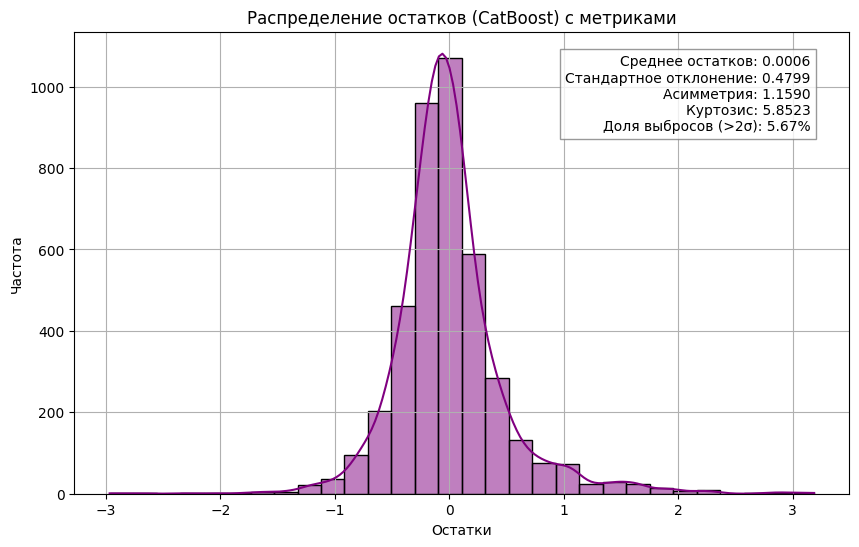

Обучение и оценка регрессора: AdaBoost
Результаты AdaBoost: MSE=0.5691, MAE=0.6078, R2=0.5657



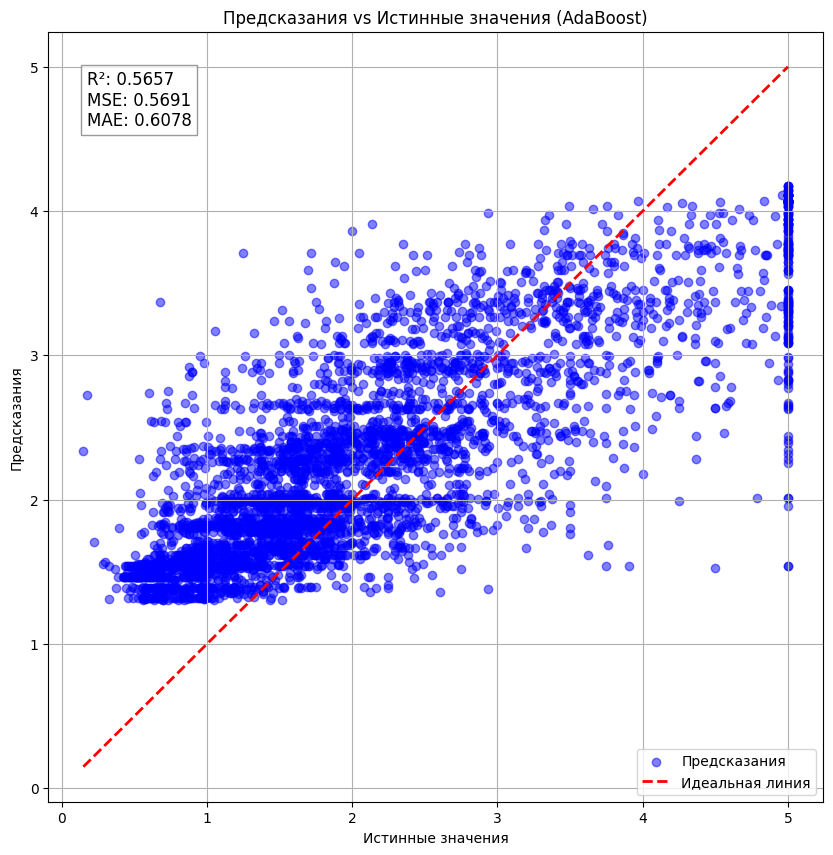

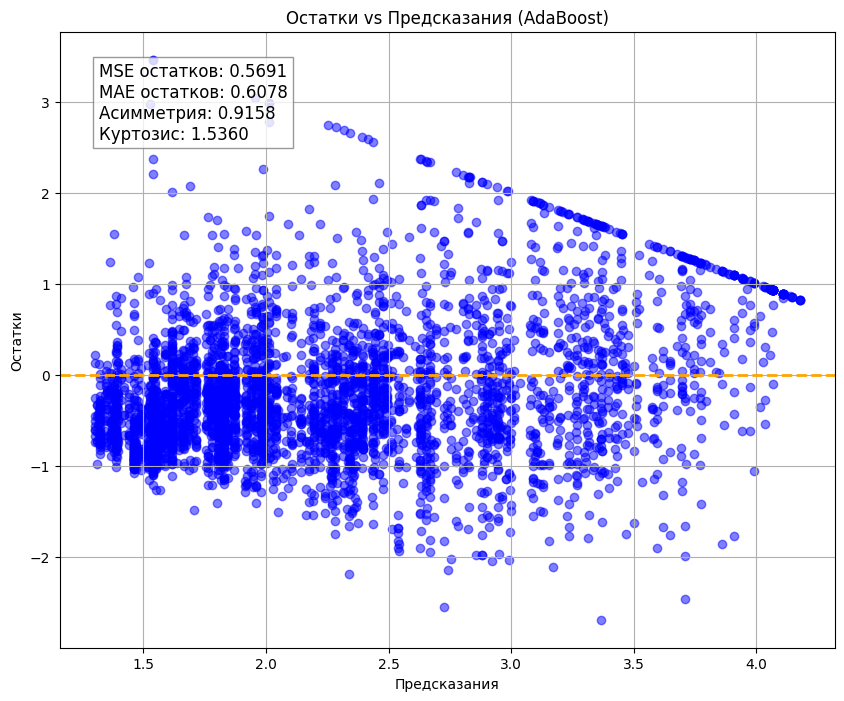

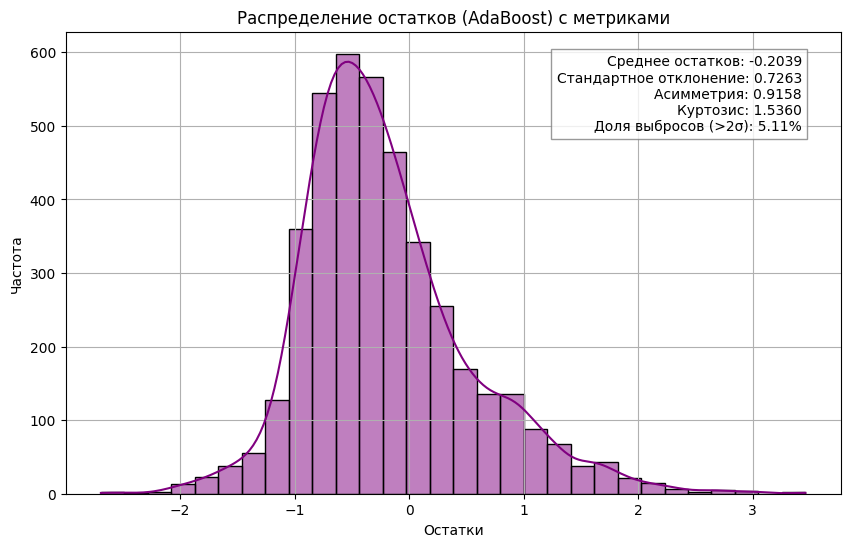

Обучение и оценка регрессора: Lasso
Результаты Lasso: MSE=0.6796, MAE=0.6222, R2=0.4814



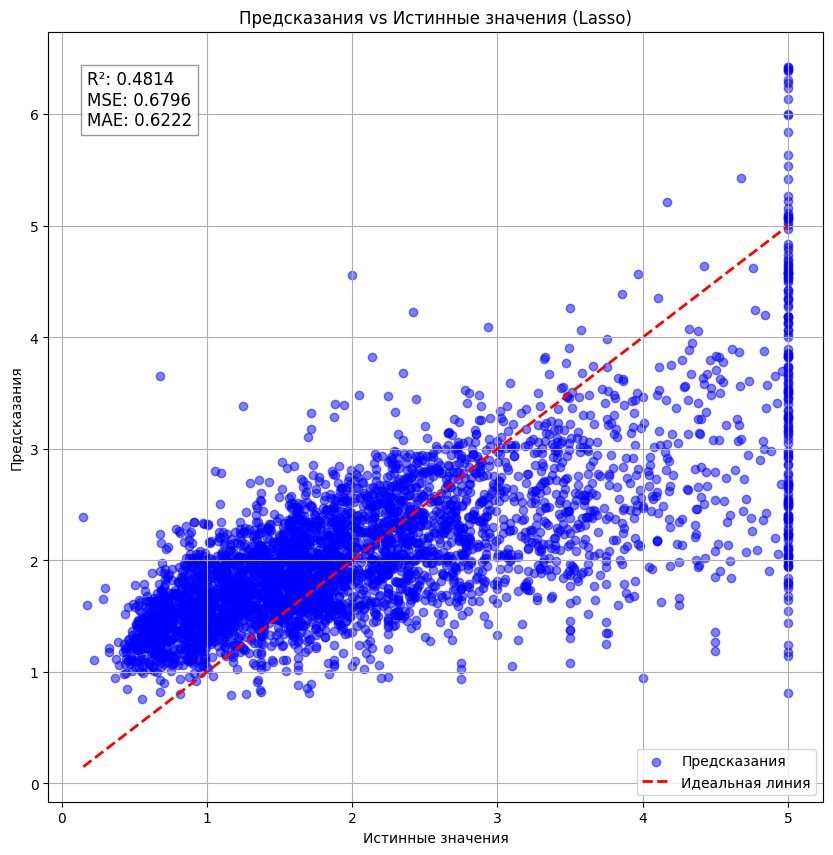

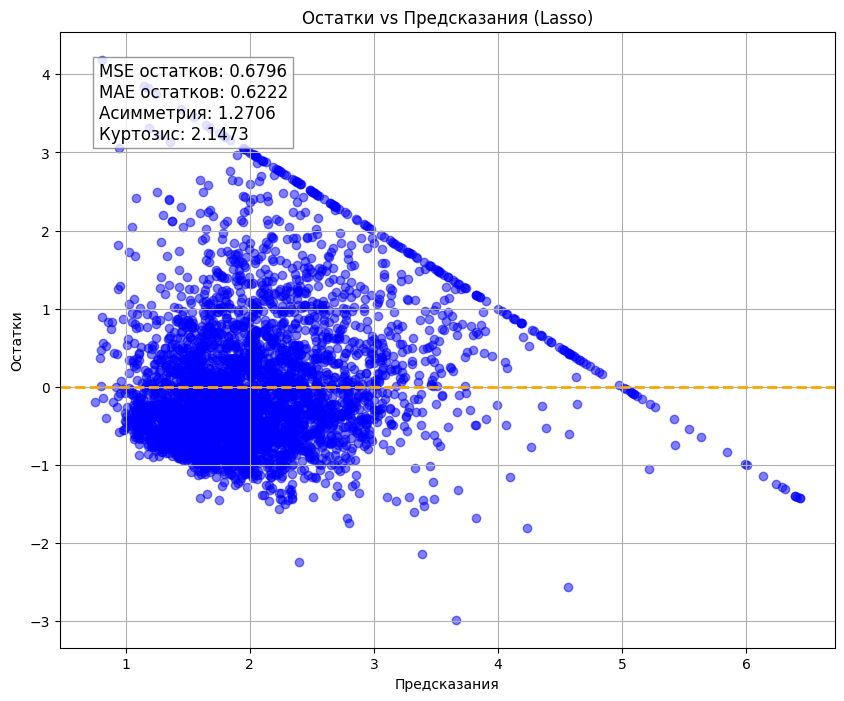

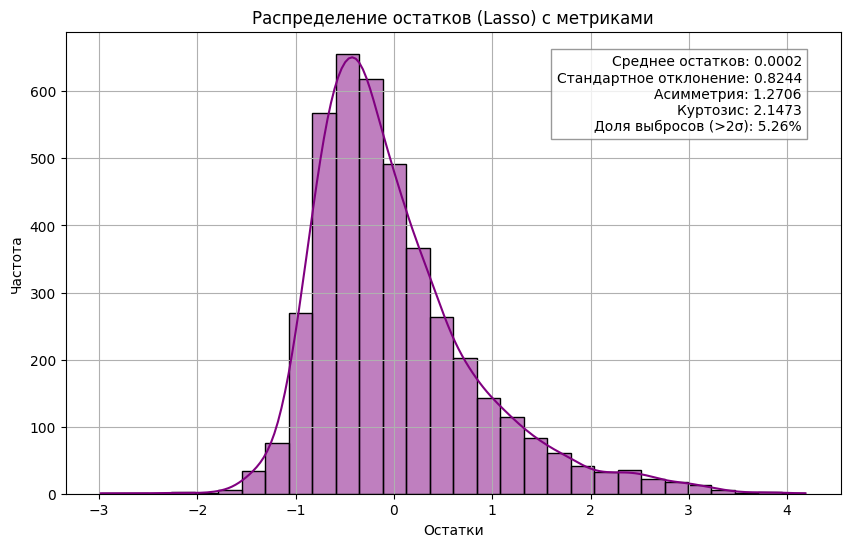

Обучение и оценка регрессора: Ridge
Результаты Ridge: MSE=0.5559, MAE=0.5332, R2=0.5758



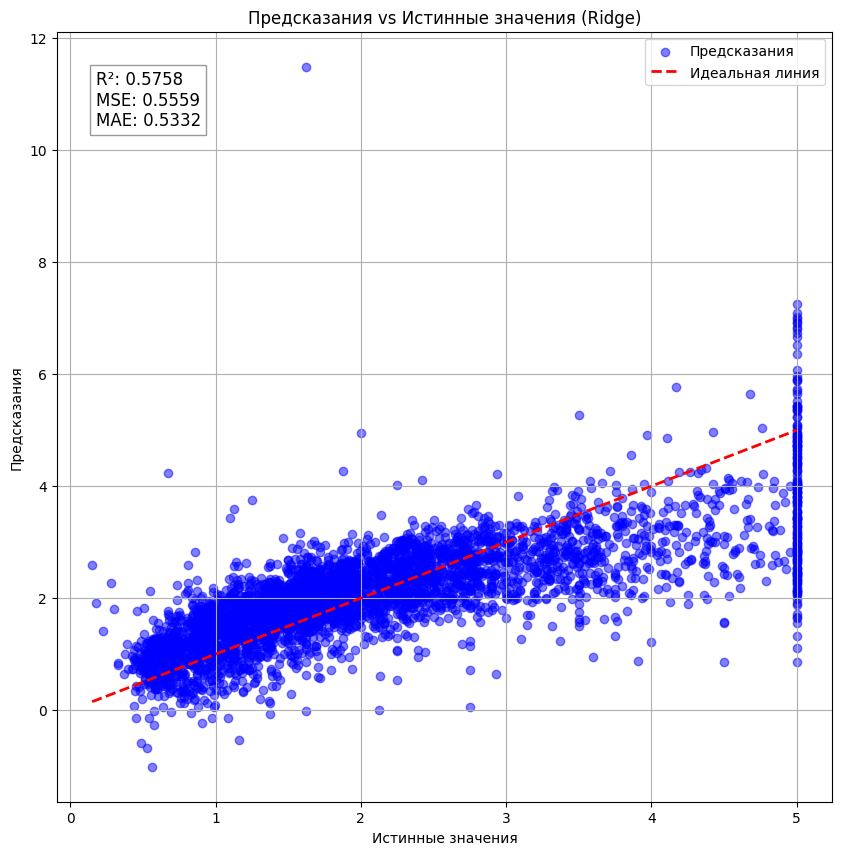

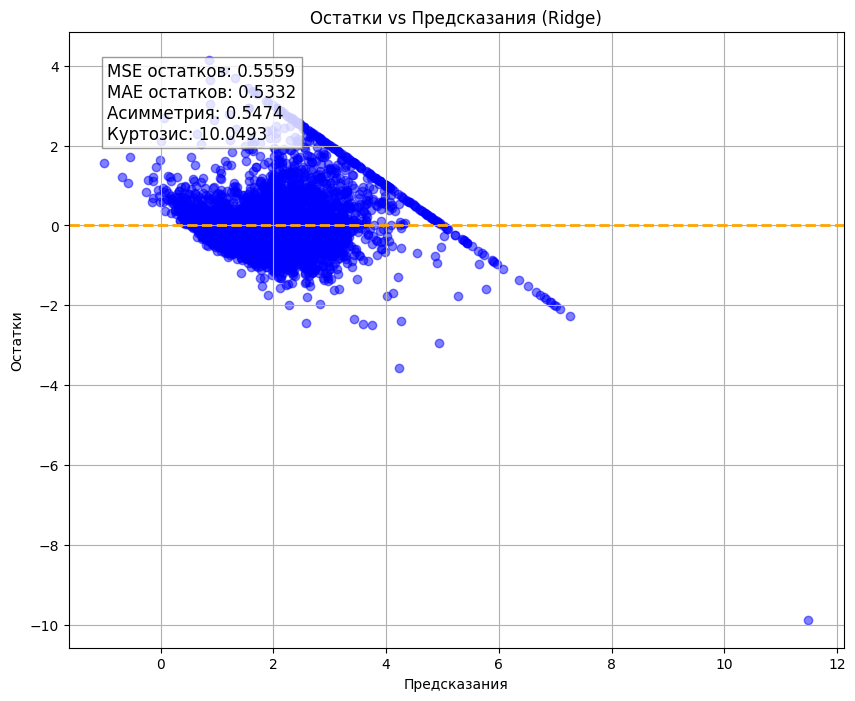

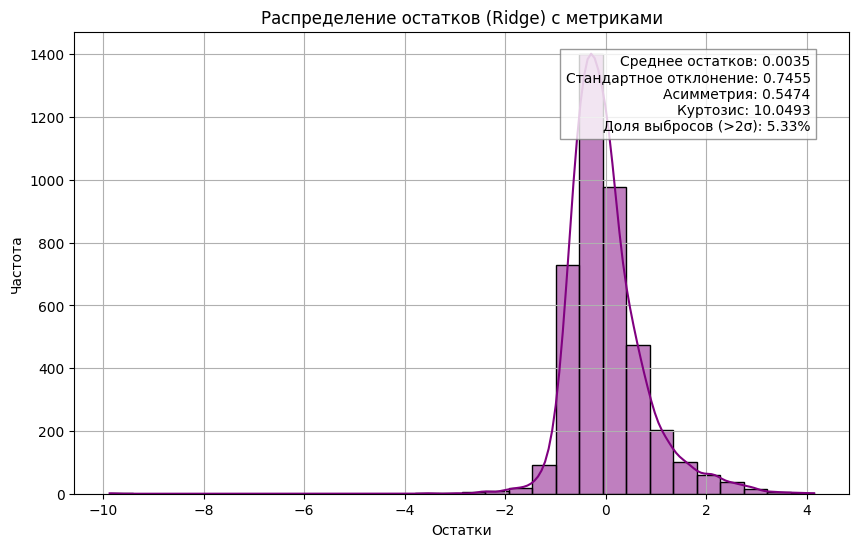

Обучение и оценка регрессора: Bayesian Ridge
Результаты Bayesian Ridge: MSE=0.5558, MAE=0.5332, R2=0.5758



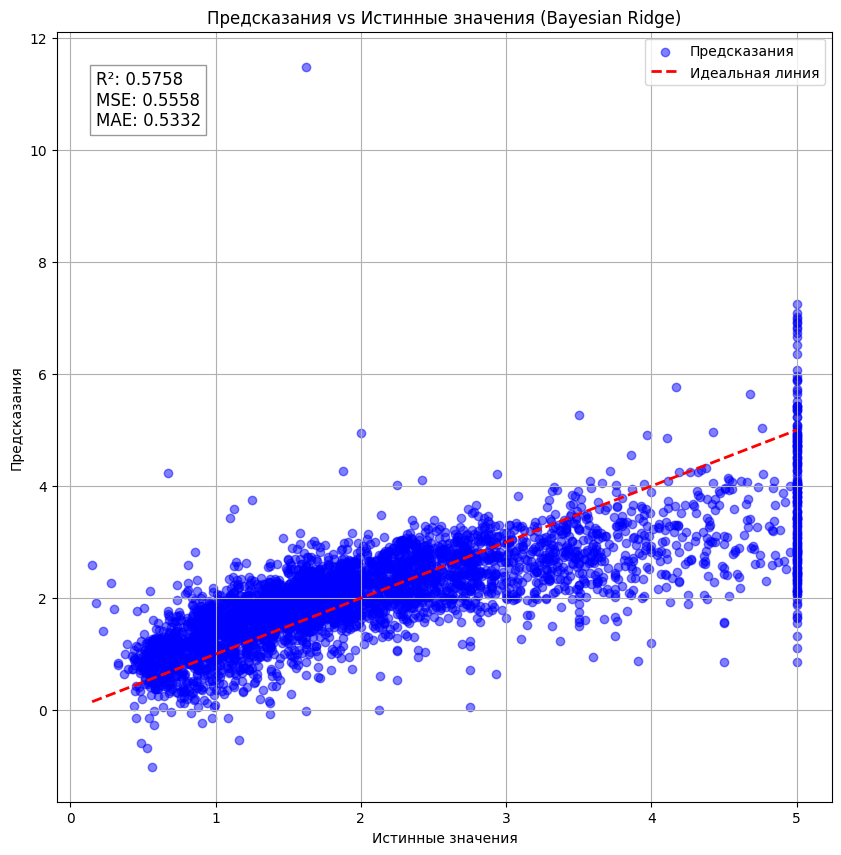

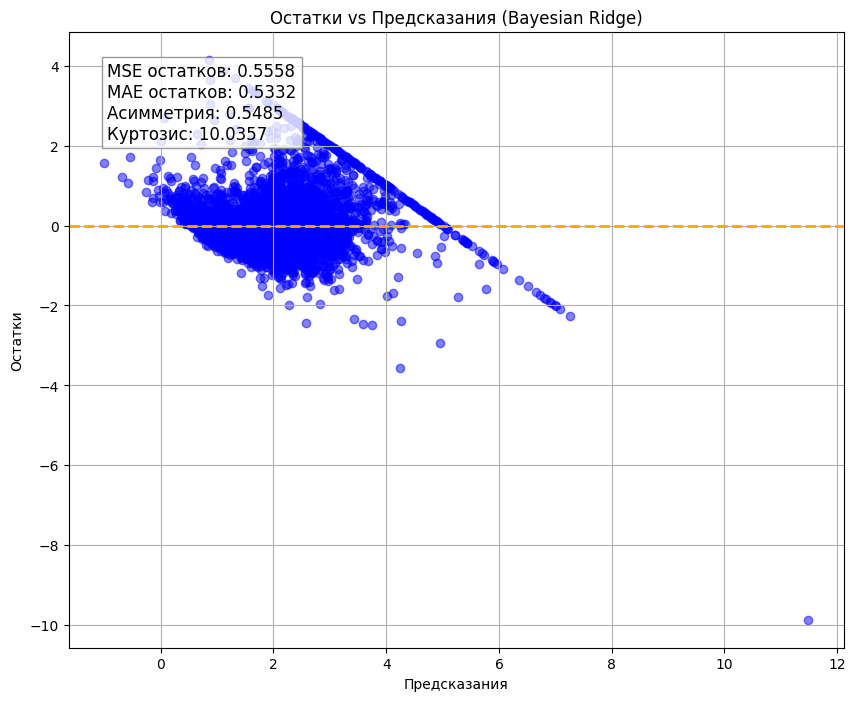

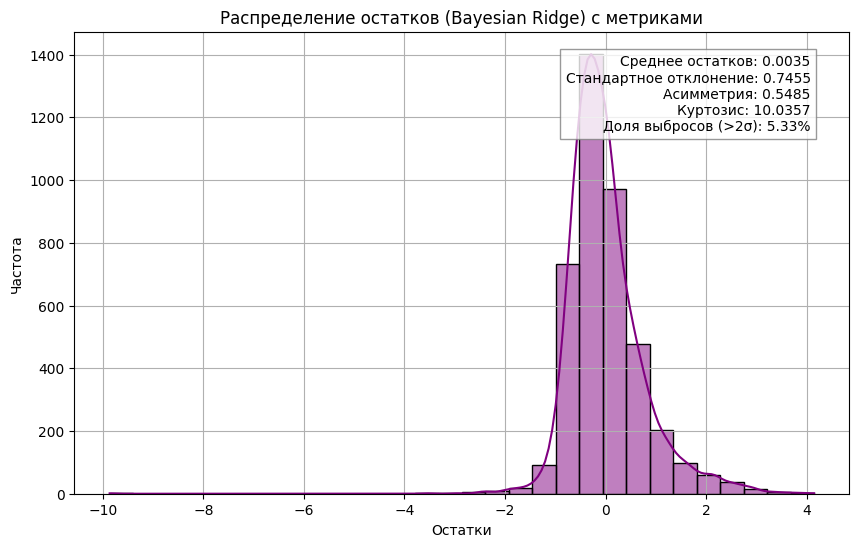

Обучение и оценка регрессора: Linear Regression
Результаты Linear Regression: MSE=0.5559, MAE=0.5332, R2=0.5758



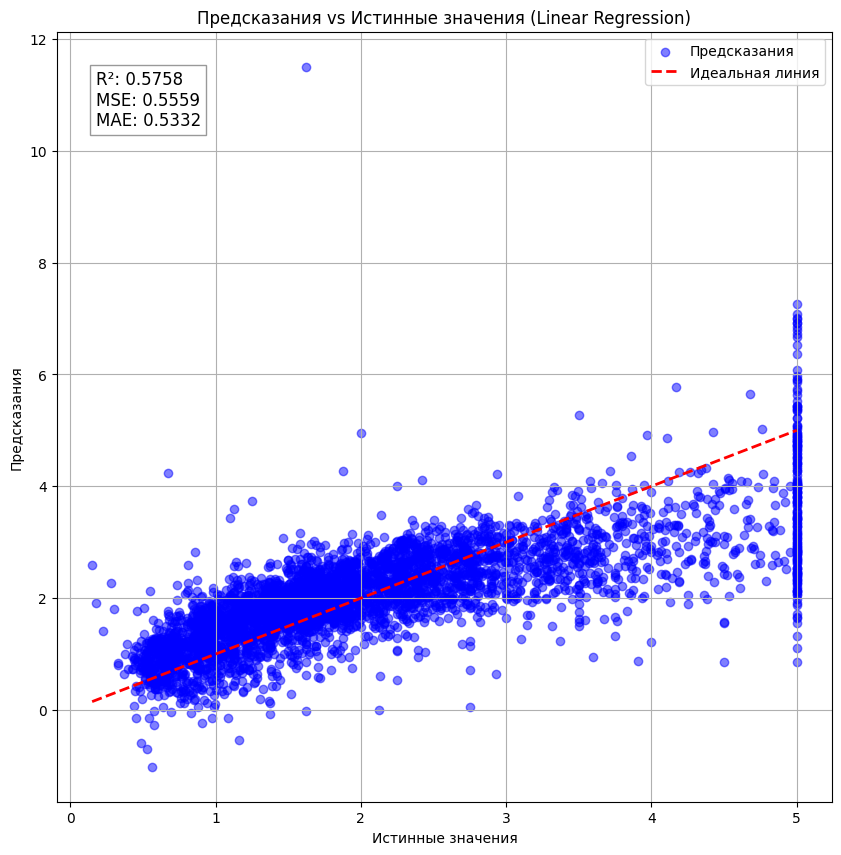

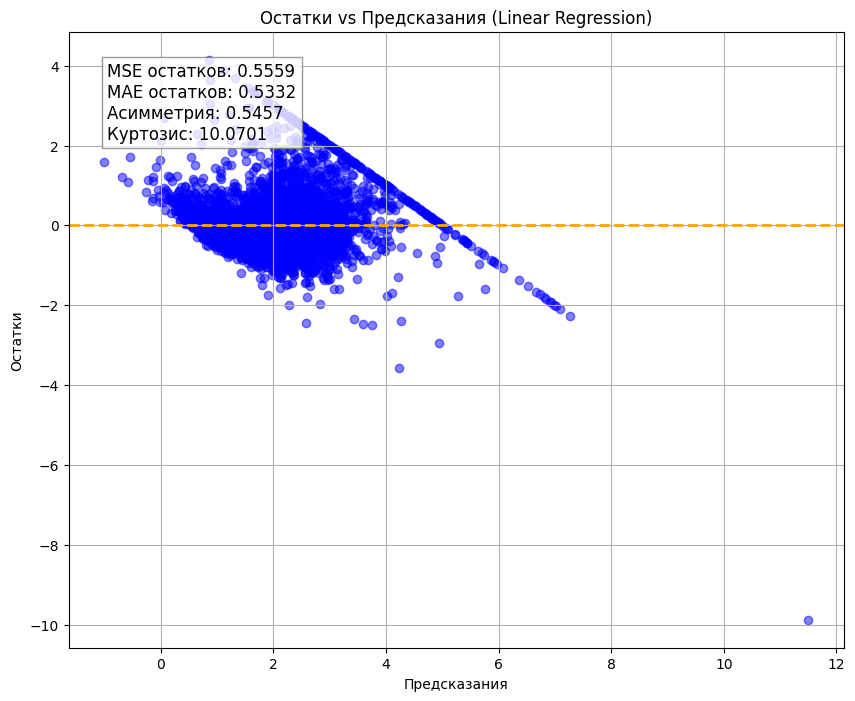

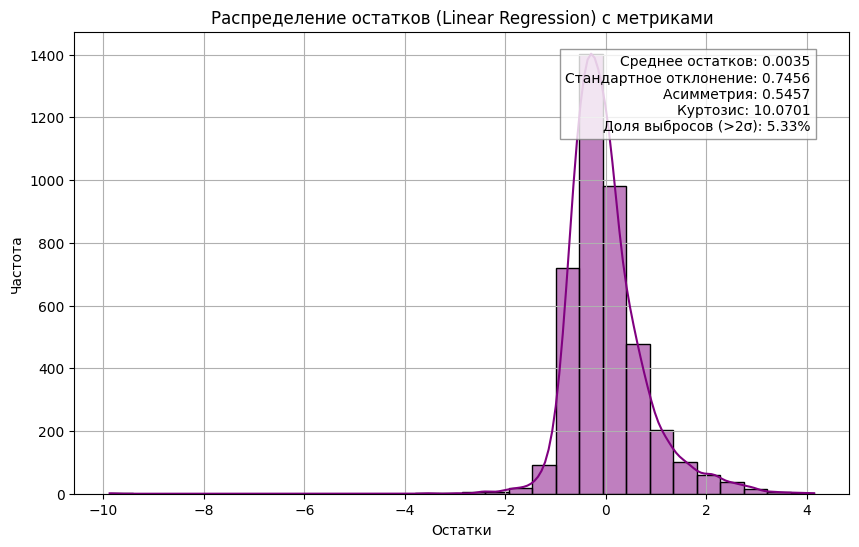

Обучение и оценка регрессора: Huber
Результаты Huber: MSE=0.5752, MAE=0.5158, R2=0.5610



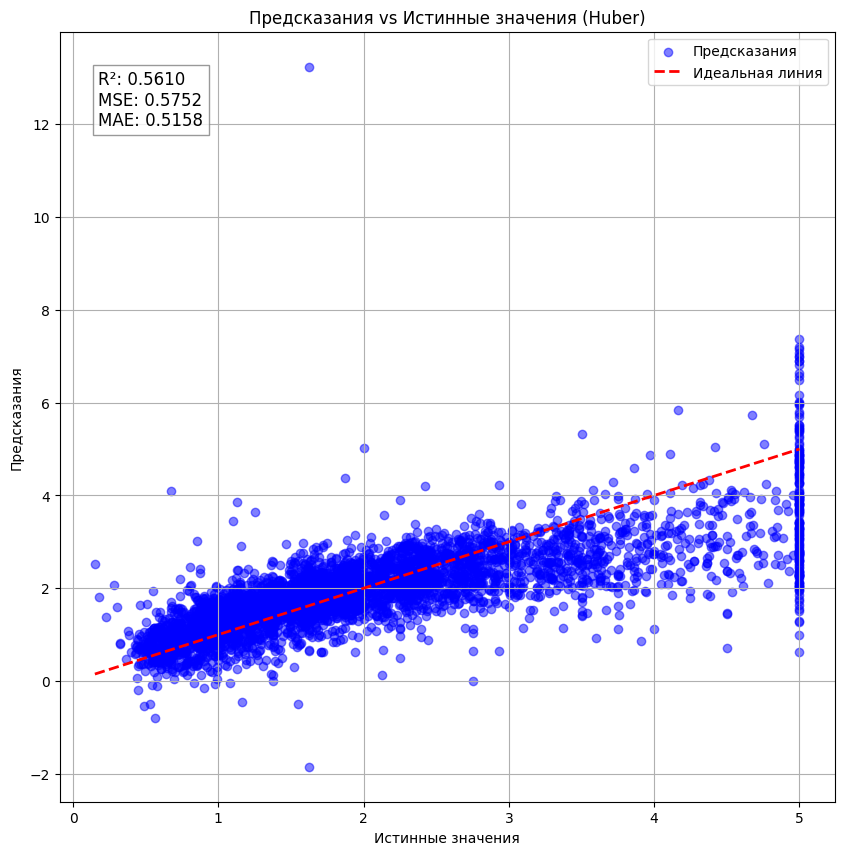

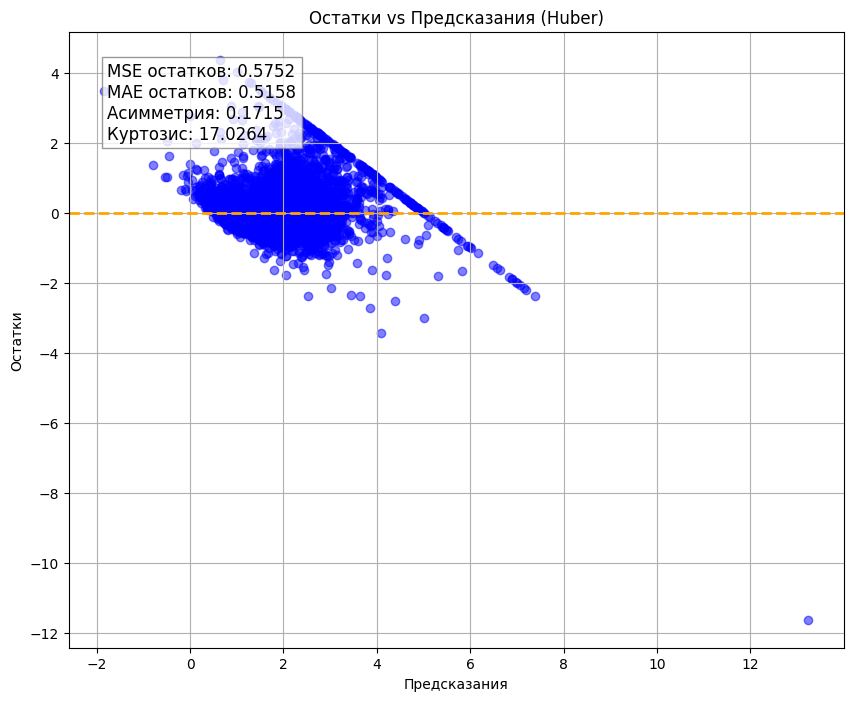

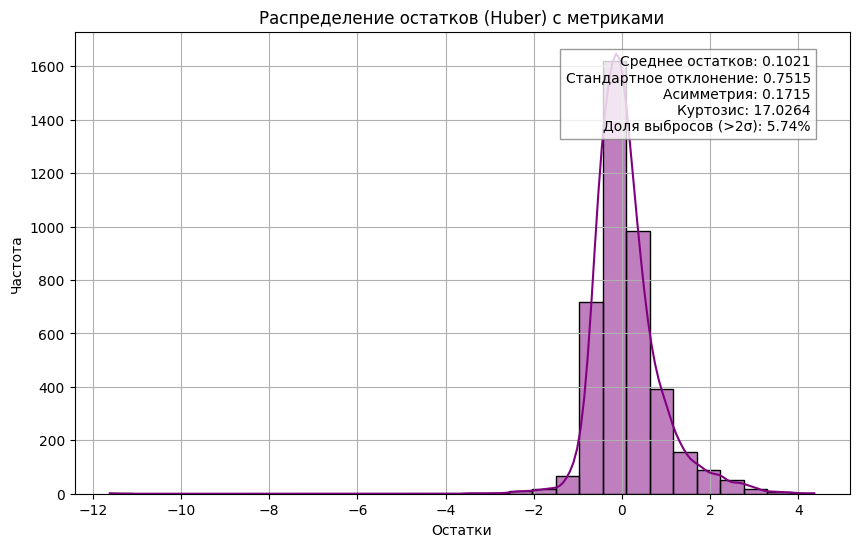

Обучение и оценка регрессора: Elastic Net
Результаты Elastic Net: MSE=1.0442, MAE=0.8060, R2=0.2031



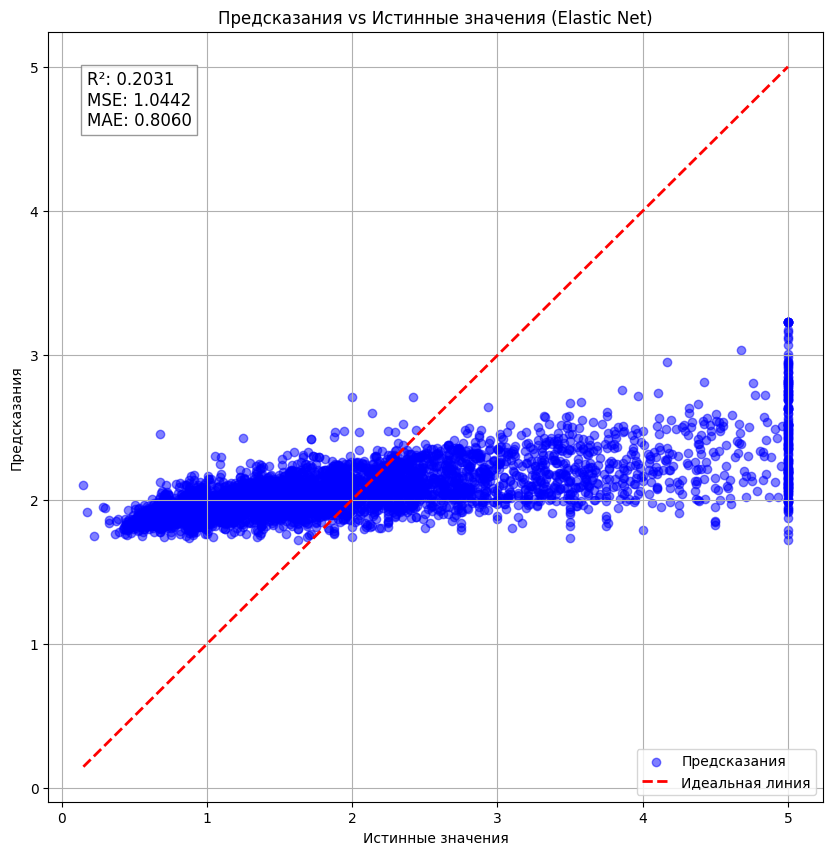

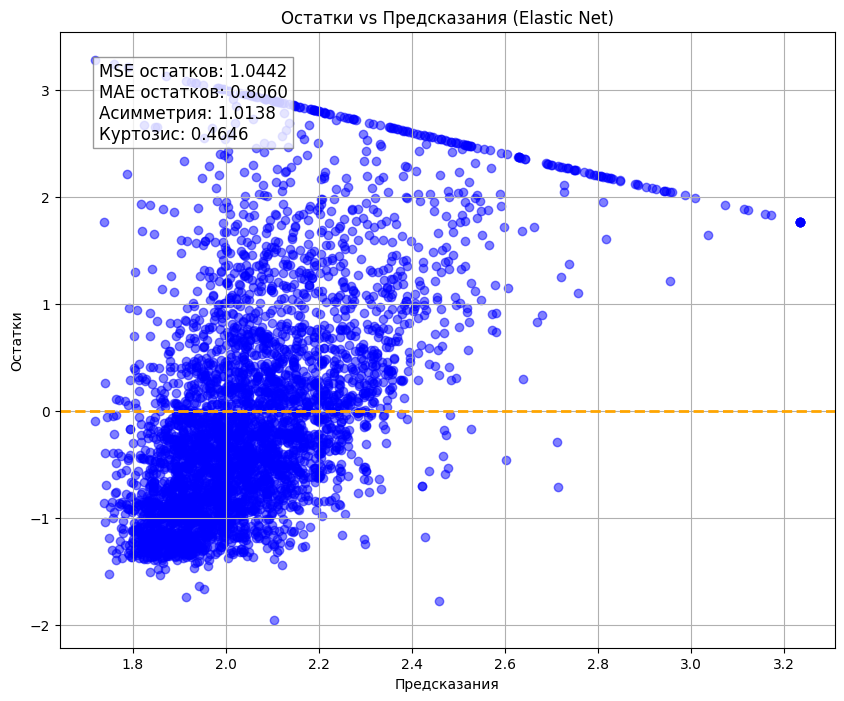

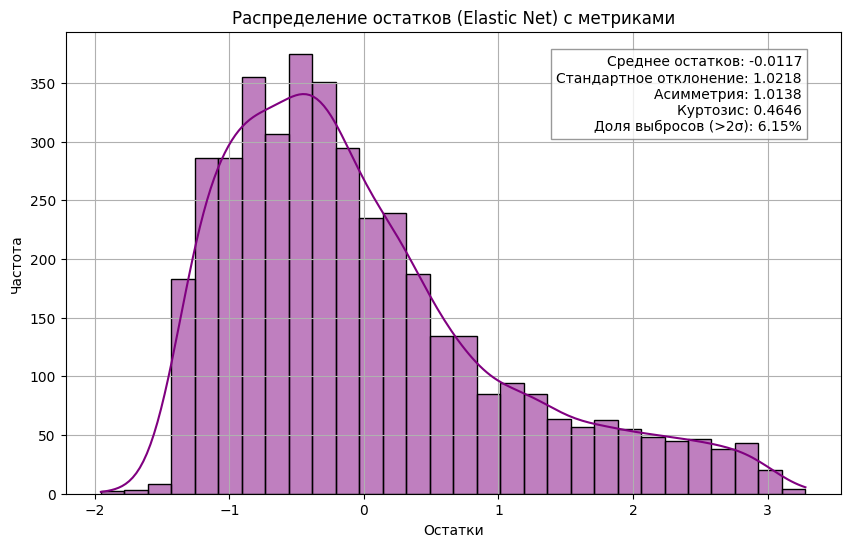

Обучение и оценка регрессора: Passive Aggressive
Результаты Passive Aggressive: MSE=1.6622, MAE=0.6945, R2=-0.2684



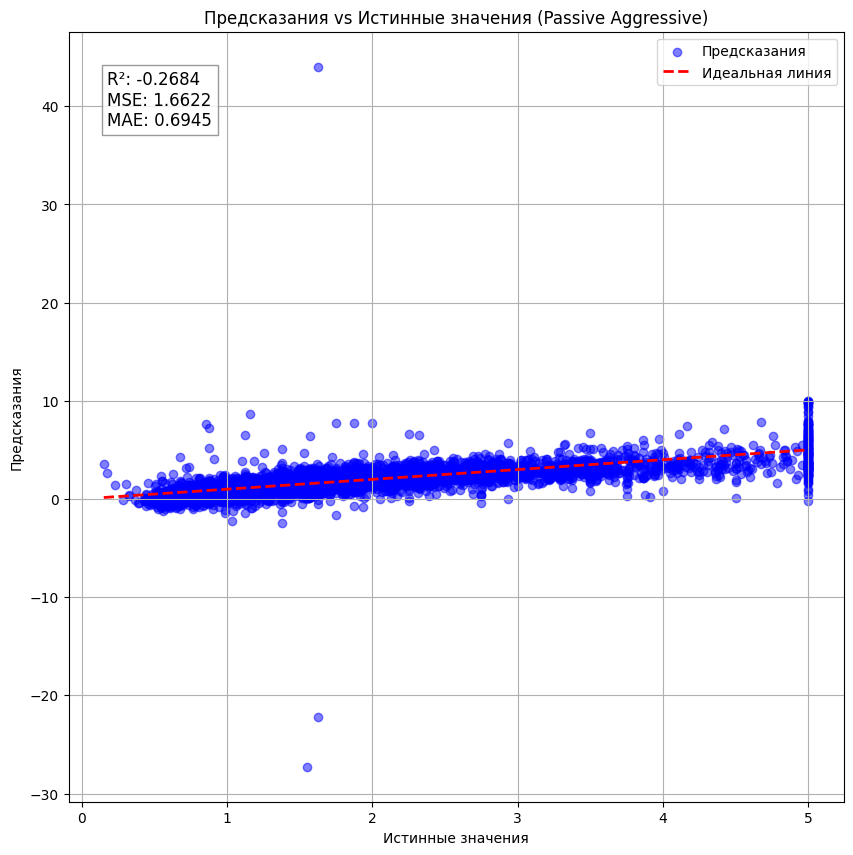

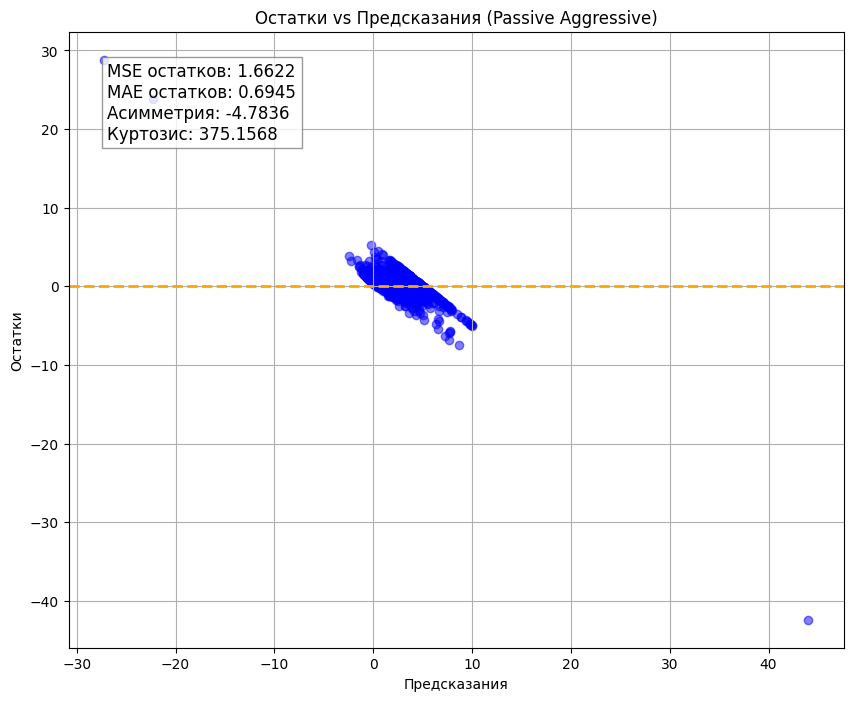

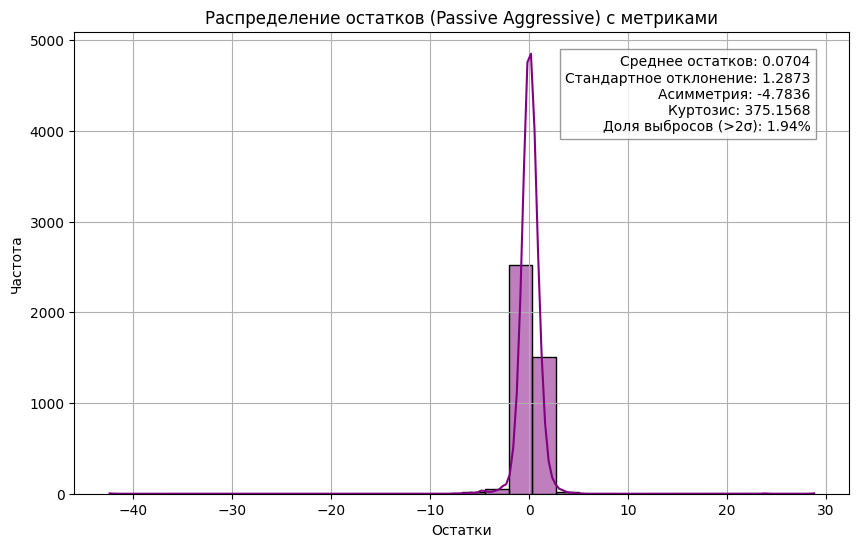

Обучение и оценка регрессора: Decision Tree
Результаты Decision Tree: MSE=0.4973, MAE=0.5008, R2=0.6205



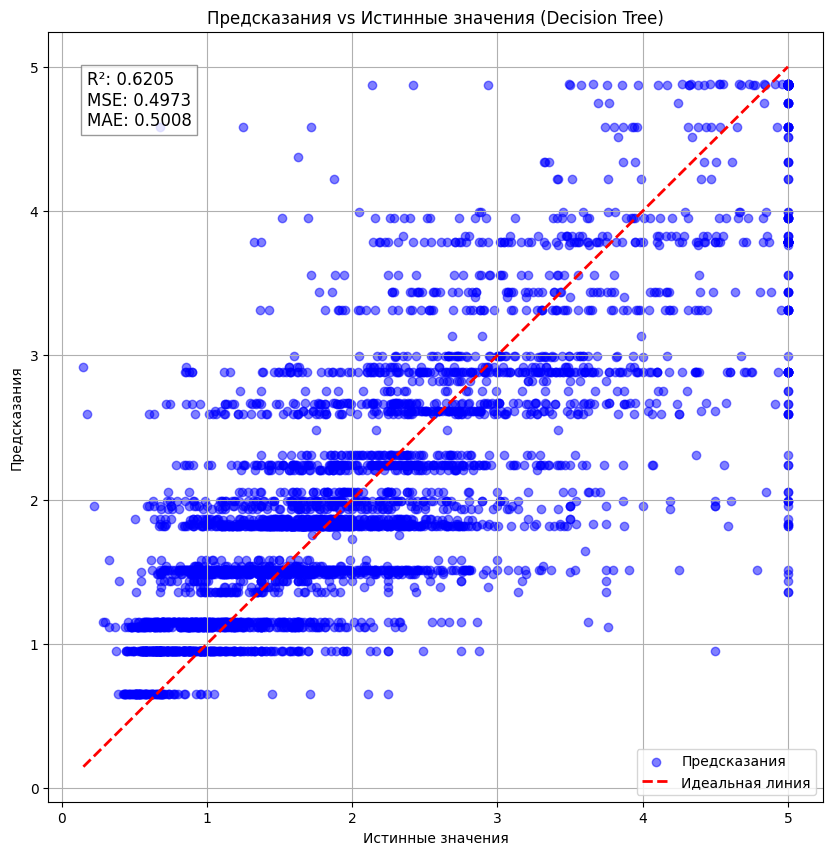

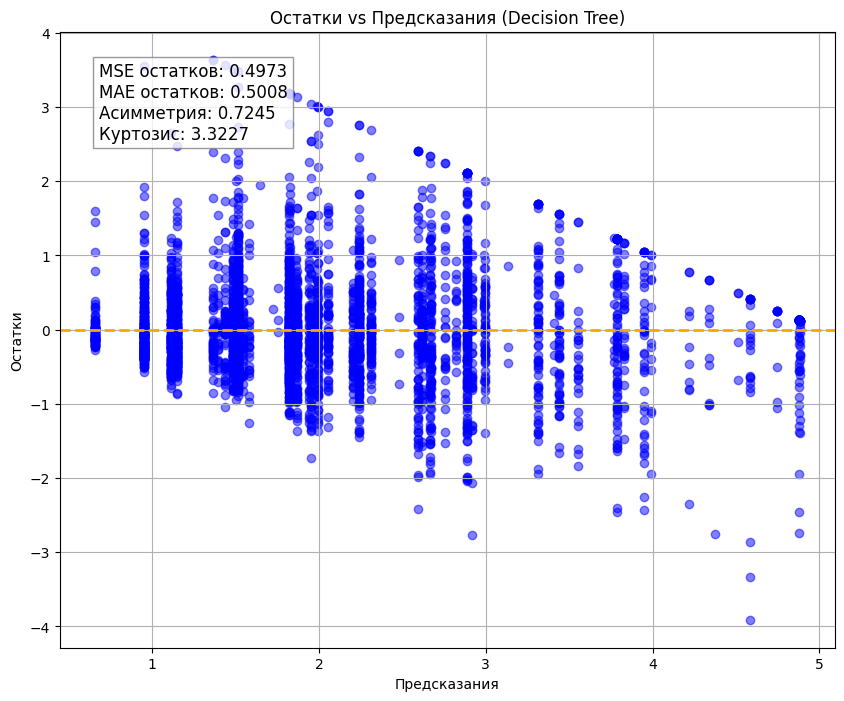

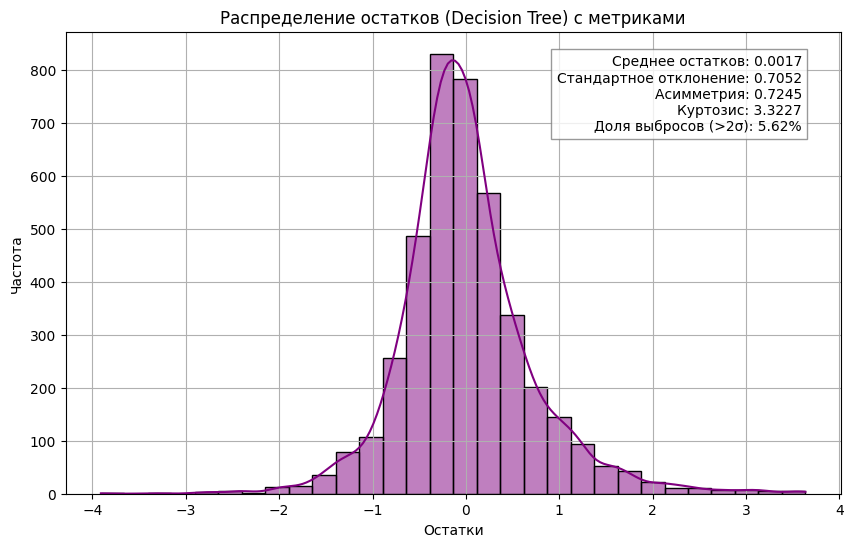

Обучение и оценка регрессора: KNN
Результаты KNN: MSE=0.4300, MAE=0.4440, R2=0.6719



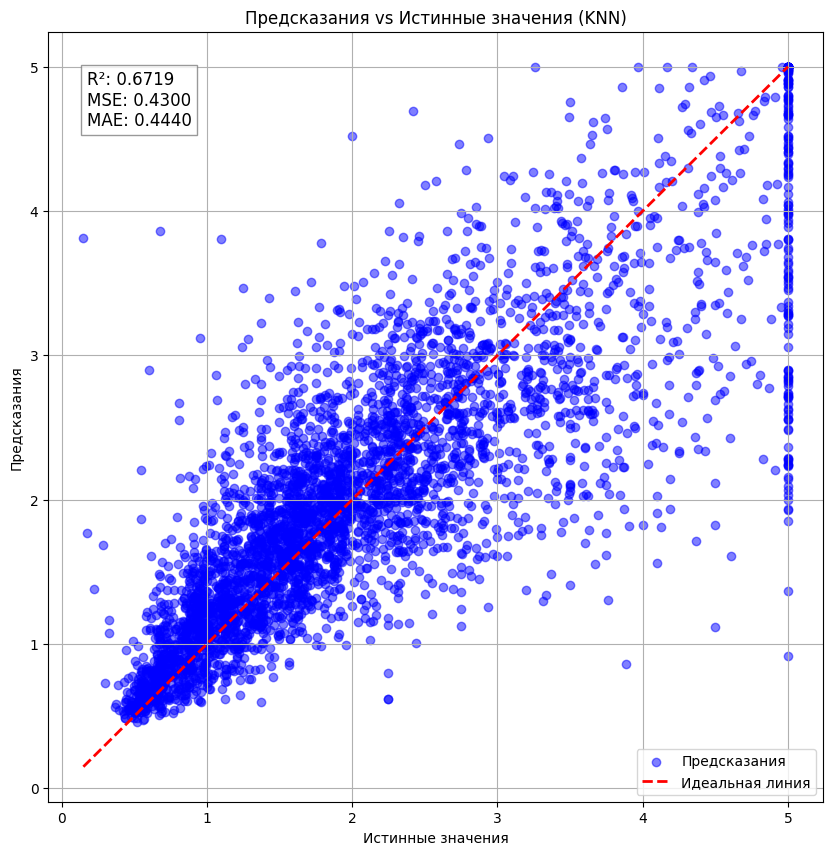

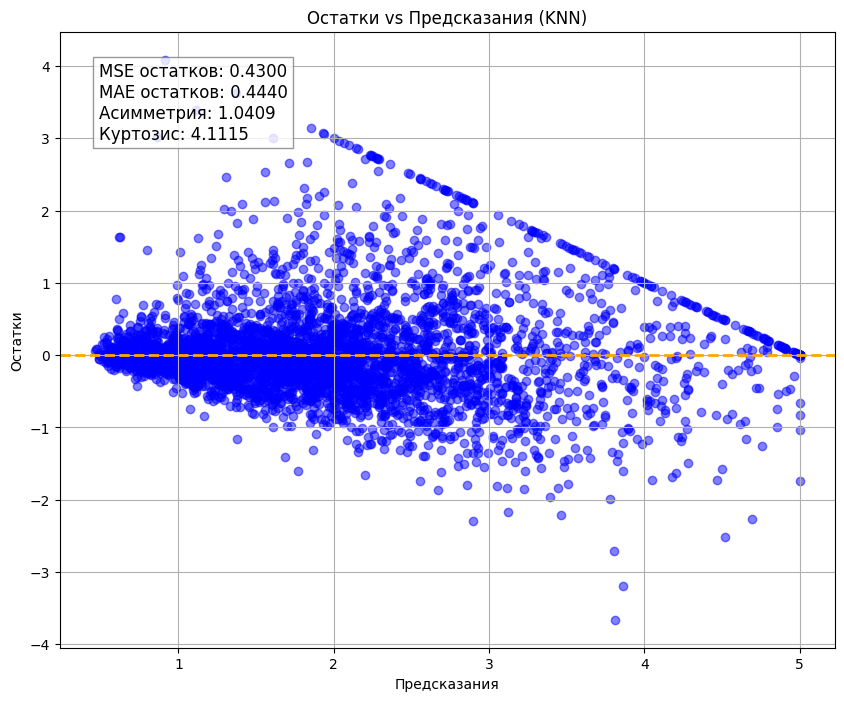

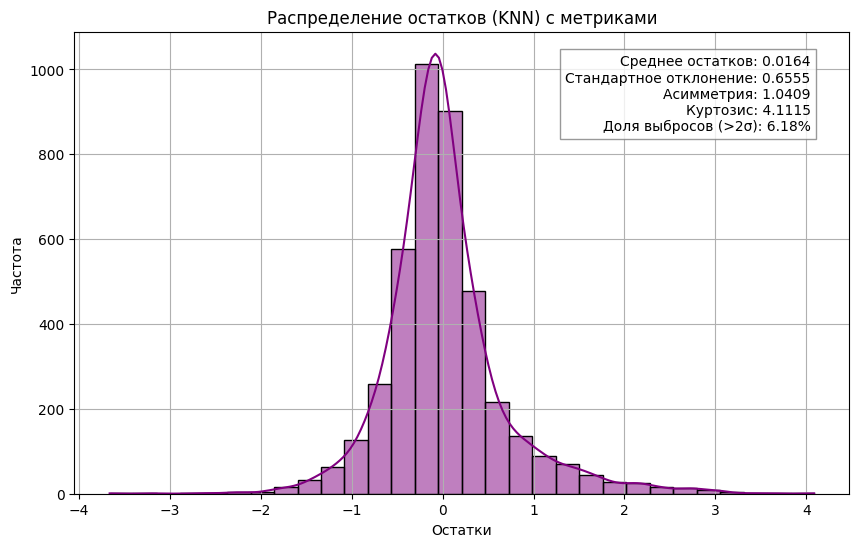

Обучение и оценка регрессора: Dummy
Результаты Dummy: MSE=1.3107, MAE=0.9061, R2=-0.0002



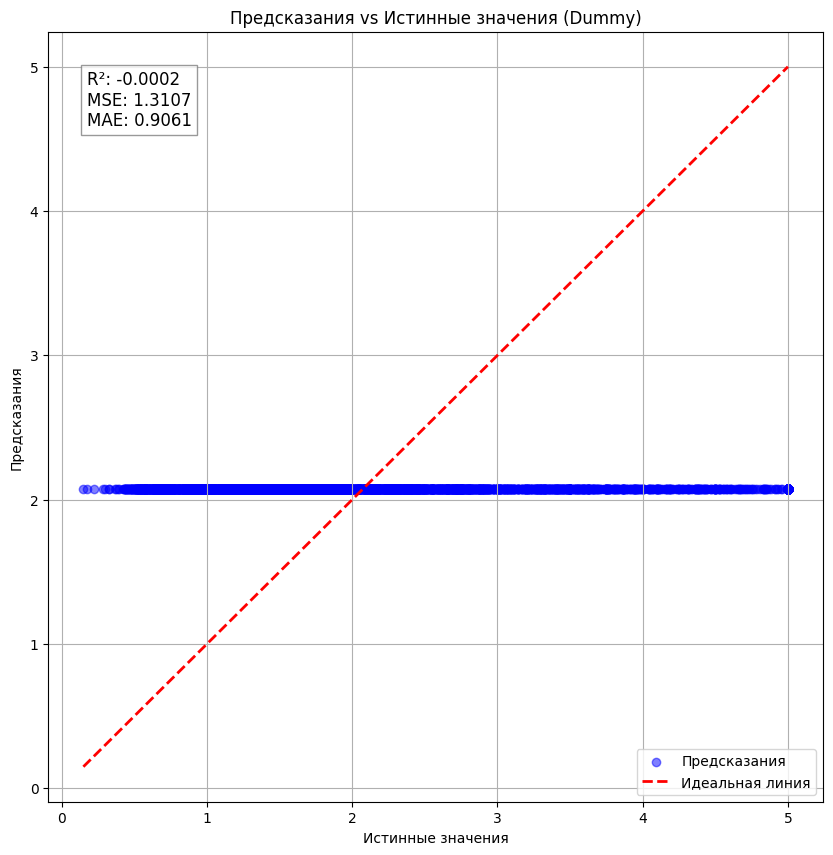

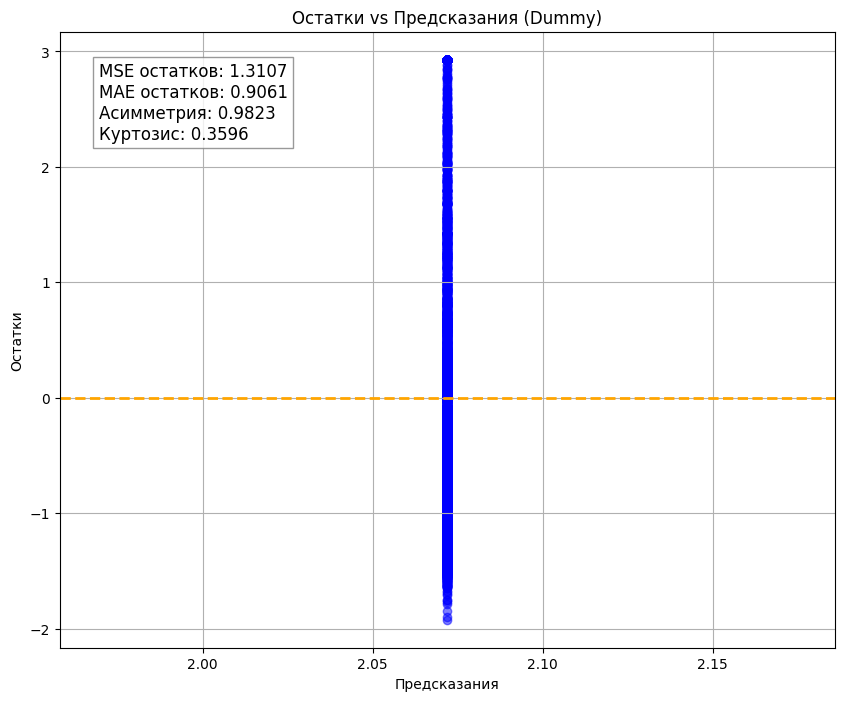

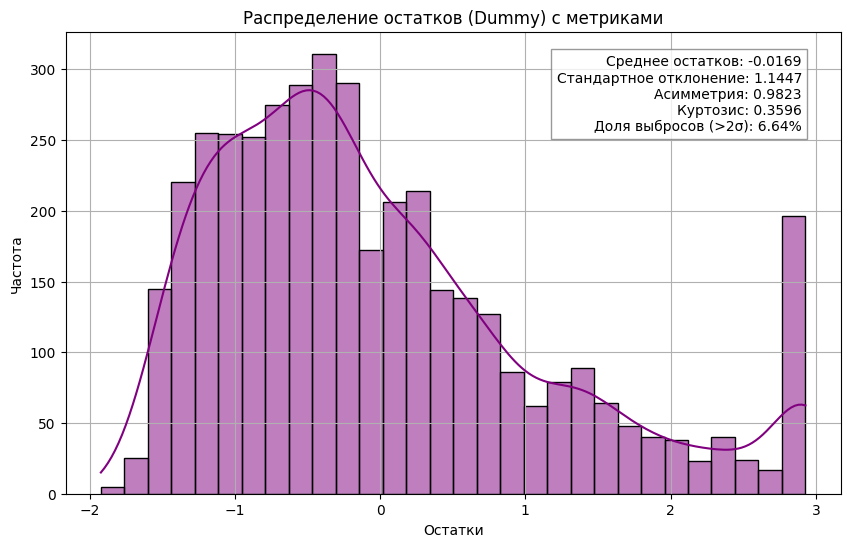


Повторное обучение LGBM с учетом дисбаланса...

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.360628
Результаты LGBM до повторного обучения:
MSE=0.2010, MAE=0.2941, R2=0.8466

Результаты LGBM после повторного обучения:
MSE=0.2407, MAE=0.3341, R2=0.8163


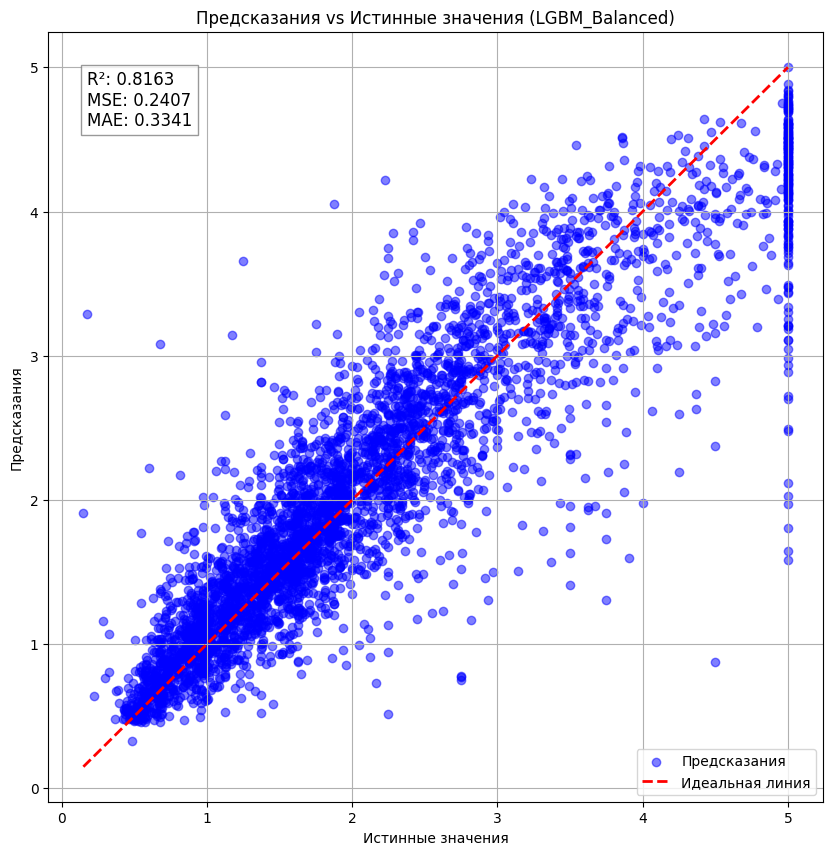

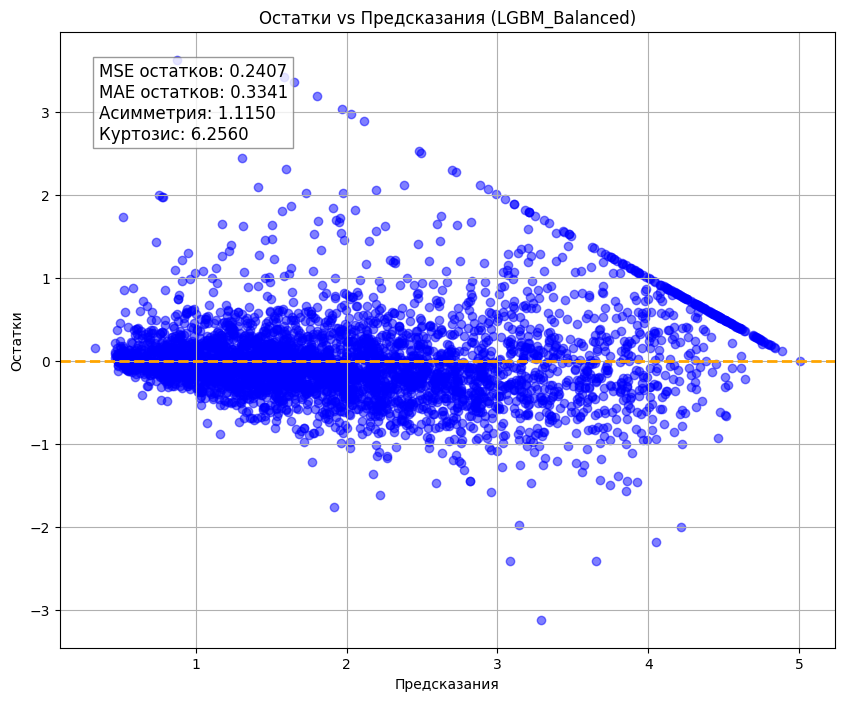

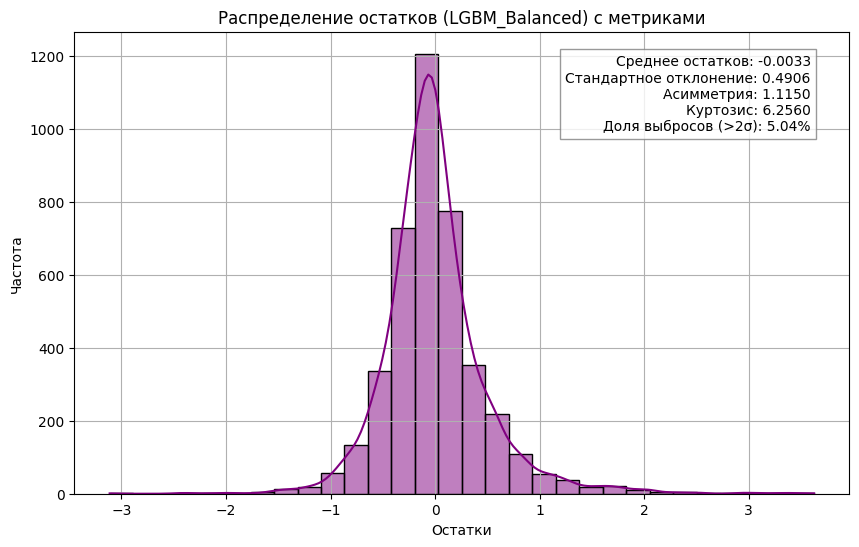

Программа завершена.


In [63]:
!pip freeze > requirements.txt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils.class_weight import compute_sample_weight
from regressor import build_regressors
from save import save_to_csv
from visualization import (
    plot_target_distribution,
    plot_predictions_vs_actual,
    plot_residuals,
    plot_residuals_vs_predictions,
    plot_feature_importance,
    plot_residual_statistics,
)
from my_logging import setup_logging
import pandas as pd
import warnings
import numpy as np
import lightgbm as lgb

# Отключение FutureWarning для библиотек
warnings.filterwarnings("ignore", category=FutureWarning)

# Основной код
if __name__ == "__main__":
    # Настройка логирования
    logger = setup_logging()
    logger.info("Начало выполнения программы.")

    # Создание папки для сохранения результатов
    output_folder = "output"
    os.makedirs(output_folder, exist_ok=True)

    # Шаг 1: Загрузка датасета
    logger.info("Шаг 1: Загрузка данных.")
    dataset = fetch_california_housing(as_frame=True)
    df = dataset.frame
    target_column = "MedHouseVal"

    logger.info(f"Загружен датасет. Размер данных: {df.shape}")
    print(f"Датасет загружен. Размер данных: {df.shape}\n")

    # Шаг 2: Проверка на пропущенные значения
    logger.info("Шаг 2: Проверка на пропущенные значения.")
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Пропущенные значения в данных:\n", missing_values[missing_values > 0], "\n")
        logger.warning("В данных обнаружены пропущенные значения.")
    else:
        print("Пропущенных значений в данных нет.\n")
        logger.info("Пропущенных значений в данных нет.")

    # Шаг 3: Описание данных
    logger.info("Шаг 3: Описание данных.")
    print("Описание данных:")
    print(df.describe(), "\n")
    print("Типы данных:")
    print(df.dtypes, "\n")

    # Шаг 4: Анализ целевой переменной
    logger.info("Шаг 4: Анализ целевой переменной.")
    y = df[target_column]
    plot_target_distribution(y, output_folder, show=True)  # Визуализация распределения
    print("График выше показывает распределение целевой переменной `MedHouseVal` (медианной стоимости домов).")

    # Добавление комментария о распределении
    print(
        "\nЗначения целевой переменной сконцентрированы в диапазоне от 0 до 3 с двумя явными пиками около 1 и 5.\n"
        "Вероятно, ваше распределение асимметрично и мультимодальное.\n"
        "Если модель плохо предсказывает редкие значения (например, между 3 и 4), "
        "стоит рассмотреть методы обработки дисбаланса данных или добавить веса для редких значений.\n"
    )

    # Шаг 5: Подготовка данных
    logger.info("Шаг 5: Подготовка данных.")
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Разделение данных на обучающую и тестовую выборки
    logger.info("Разделение данных на обучающую и тестовую выборки.")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    logger.info(f"Данные разделены: обучающая выборка {X_train.shape}, тестовая выборка {X_test.shape}")
    print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}\n")

    # Шаг 6: Построение и настройка регрессоров
    logger.info("Шаг 6: Построение и настройка регрессоров.")
    regressors = build_regressors()

    # Шаг 7: Обучение, предсказание и оценка регрессоров
    logger.info("Шаг 7: Обучение, предсказание и оценка регрессоров.")
    results = []
    lgb_initial_metrics = None  # Переменная для сохранения метрик LGBM до повторного обучения

    for name, regressor in regressors.items():
        logger.info(f"Обучение и оценка регрессора: {name}")
        print(f"Обучение и оценка регрессора: {name}")

        try:
            # Создание пайплайна
            if name in ["LGBM", "Random Forest"]:
                pipeline = Pipeline([("model", regressor)])
            else:
                pipeline = Pipeline([
                    ("scaler", StandardScaler()),
                    ("model", regressor),
                ])

            # Обучение модели
            pipeline.fit(X_train, y_train)

            # Предсказание
            logger.info(f"Предсказание для регрессора {name}.")
            y_pred = pipeline.predict(X_test)

            # Вычисление метрик
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Сохранение метрик для LGBM
            if name == "LGBM":
                lgb_initial_metrics = {"MSE": mse, "MAE": mae, "R2": r2}

            # Логирование и вывод метрик
            logger.info(f"Результаты регрессора {name}: MSE={mse}, MAE={mae}, R2={r2}")
            print(f"Результаты {name}: MSE={mse:.4f}, MAE={mae:.4f}, R2={r2:.4f}\n")

            # Сохранение результатов
            results.append({
                "Regressor": name,
                "MSE": mse,
                "MAE": mae,
                "R2": r2,
            })

            # Визуализация
            logger.info(f"Создание визуализаций для регрессора: {name}.")
            plot_predictions_vs_actual(y_test, y_pred, output_folder, name, mse, mae, r2, show=True)
            plot_residuals_vs_predictions(y_test, y_pred, output_folder, name, show=True)
            plot_residual_statistics(y_test, y_pred, output_folder, name, show=True)  # График остатков

        except Exception as e:
            logger.error(f"Ошибка для регрессора {name}: {e}")
            print(f"Ошибка регрессора {name}: {e}\n")
            results.append({
                "Regressor": name,
                "MSE": None,
                "MAE": None,
                "R2": None,
                "Error": str(e),
            })

    # Повторное обучение LGBM (если это лучший регрессор)
    if best_regressor["Regressor"] == "LGBM":
        logger.info("Повторное обучение LGBM с учетом дисбаланса...")
        print("\nПовторное обучение LGBM с учетом дисбаланса...\n")

        # Рассчет весов
        sample_weights = compute_sample_weight("balanced", y_train)

        # Обучение модели с учетом весов
        lgb_model = lgb.LGBMRegressor(random_state=42)
        lgb_model.fit(X_train, y_train, sample_weight=sample_weights)

        # Предсказание
        y_pred_balanced = lgb_model.predict(X_test)

        # Вычисление метрик после повторного обучения
        mse_balanced = mean_squared_error(y_test, y_pred_balanced)
        mae_balanced = mean_absolute_error(y_test, y_pred_balanced)
        r2_balanced = r2_score(y_test, y_pred_balanced)

        # Вывод сравнения
        print("Результаты LGBM до повторного обучения:")
        print(f"MSE={lgb_initial_metrics['MSE']:.4f}, MAE={lgb_initial_metrics['MAE']:.4f}, R2={lgb_initial_metrics['R2']:.4f}")

        print("\nРезультаты LGBM после повторного обучения:")
        print(f"MSE={mse_balanced:.4f}, MAE={mae_balanced:.4f}, R2={r2_balanced:.4f}")

        # Визуализация
        plot_predictions_vs_actual(y_test, y_pred_balanced, output_folder, "LGBM_Balanced", mse_balanced, mae_balanced, r2_balanced, show=True)
        plot_residuals_vs_predictions(y_test, y_pred_balanced, output_folder, "LGBM_Balanced", show=True)
        plot_residual_statistics(y_test, y_pred_balanced, output_folder, "LGBM_Balanced", show=True)

    logger.info("Программа завершена.")
    print("Программа завершена.")

Выводы по результатам:

Почему выбрали LightGBM:

Высокая точность на исходных данных:
До повторного обучения LightGBM показал лучшие результаты среди всех регрессоров по метрикам:
MSE (0.2010): Минимальная ошибка среди остальных моделей (чем меньше, тем лучше).
MAE (0.2941): Средняя абсолютная ошибка была минимальной, что говорит о том, что модель делает меньшие отклонения в предсказаниях.
R² (0.8466): Коэффициент детерминации был на уровне 84.66%, что указывает на высокую объясняющую способность модели.
Эти показатели говорят о том, что LightGBM эффективно обрабатывает данные и делает точные предсказания.
Баланс между скоростью и точностью:
LightGBM использует бустинг на основе деревьев решений, что позволяет ему быть очень быстрым при обучении, особенно на больших наборах данных.
В отличие от других моделей (например, Random Forest), LightGBM лучше справляется с высокоразмерными данными и признаками разной важности.
Обработка дисбаланса данных:
LightGBM поддерживает взвешенное обучение (например, использование параметра sample_weight), что позволяет учитывать редкие значения целевой переменной. Это делает его подходящим для задач с мультимодальным распределением целевой переменной, как в нашем случае.





Выводы на основе графиков и результатов модели LGBM до и после повторного обучения:

1. Результаты LGBM до и после повторного обучения:

До повторного обучения:
MSE (среднеквадратическая ошибка): 0.2010 — лучший показатель ошибки среди двух моделей (меньше — лучше).
MAE (средняя абсолютная ошибка): 0.2941 — модель в среднем ошибается на 0.2941.
R² (коэффициент детерминации): 0.8466 — высокая объясняющая способность модели (84.66% вариации целевой переменной объясняется моделью).
После повторного обучения:
MSE: 0.2407 — немного увеличилась, что указывает на ухудшение точности модели.
MAE: 0.3341 — также увеличилась, что подтверждает, что модель после повторного обучения хуже предсказывает целевую переменную.
R²: 0.8163 — снизился до 81.63%, что указывает на уменьшение объясняющей способности модели.
Вывод: Повторное обучение с учетом весов для редких значений ухудшило общую точность модели. Это может быть связано с попыткой модели больше учитывать редкие значения, что привело к увеличению ошибок для более частых значений.

2. График "Предсказания vs Истинные значения":
Идеальная линия (красная):
Точки, расположенные вдоль красной линии, указывают на точные предсказания модели.
Большая часть точек находится близко к линии, что говорит о хорошей точности.
Отклонения от линии:
Видны значительные отклонения для редких значений (например, выше 4), что указывает на трудности модели с предсказанием редких случаев.
После повторного обучения модель пытается предсказывать редкие значения, но это приводит к увеличению ошибок.
Вывод: Модель предсказывает основные значения (0–3) достаточно точно, но теряет точность при работе с редкими значениями, особенно после добавления весов.

3. График "Остатки vs Предсказания":
Остатки:
Большинство остатков сосредоточено вокруг 0, что говорит о том, что модель в целом хорошо предсказывает данные.
Выбросы (значения выше или ниже ±2) указывают на случаи, где модель делает большие ошибки.
Асимметрия:
Асимметрия остатков (1.1150) говорит о том, что модель чаще недооценивает значения (положительные остатки), особенно для больших значений целевой переменной.
Куртозис:
Высокий куртозис (6.2560) говорит о наличии узкого пика распределения, что характерно для моделей с редкими большими ошибками.
Вывод: Модель хорошо справляется с прогнозами для значений в диапазоне 0–3, но имеет трудности с редкими случаями (особенно для предсказаний выше 4). Это подтверждается выбросами и асимметрией.

4. График "Распределение остатков":
Среднее (≈0):
Средний остаток (-0.0033) близок к нулю, что говорит об отсутствии систематической ошибки в предсказаниях.
Стандартное отклонение (0.4906):
Небольшое стандартное отклонение указывает на точность модели в большинстве случаев.
Асимметрия и куртозис:
Асимметрия (1.1150) подтверждает, что модель чаще недооценивает значения.
Куртозис (6.2560) указывает на редкие, но значительные выбросы.
Доля выбросов (>2σ): 5.04%:
Небольшое количество выбросов (5.04%) говорит о том, что модель делает редкие, но значительные ошибки.
Вывод: Распределение остатков указывает на хорошую общую точность модели, но редкие выбросы и асимметрия подтверждают трудности в предсказаниях редких значений.

Общий вывод:
До повторного обучения:
Модель LGBM хорошо справлялась с основной частью данных (0–3) и показывала высокую точность (MSE=0.2010, R²=0.8466).
После повторного обучения:
Попытка учесть редкие значения (между 3 и 4) привела к ухудшению общей точности (MSE увеличилось до 0.2407, а R² снизилось до 0.8163).
Однако распределение остатков осталось стабильным, что подтверждает, что модель не сильно сместилась.
Рекомендации:
Рассмотреть комбинированный подход: обучить две модели (одну для частых значений, другую для редких) или использовать методы балансировки, такие как SMOTE. Нет пределу совершенства! :-)
Провести дополнительный анализ выбросов, чтобы понять, почему модель делает значительные ошибки для редких значений.
Модель показывает отличные результаты для основной массы данных, но нуждается в доработке для редких случаев.